#### Libraries

In [1]:
import pandas as pd
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy.random import seed
from scipy.stats import spearmanr

#### Setup config

In [2]:
ROOT_DIR = "../"

# Where the datasets are
DATA_PATH = os.path.join(ROOT_DIR, "data")
os.makedirs(DATA_PATH, exist_ok=True)

##### Graph style

In [3]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

#### Dataframe settings

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
col_r1 = ['path',
          'qualifier',
          'reliability_rating',
          'complexity',
          'functions',
          'security_rating',
          'comment_lines_density',
          'sqale_rating',
          'comment_lines',
          'ncloc',
          'files',
          'open_issues',
          'bugs',
          'test_success_density',
          'vulnerabilities',
          'duplicated_lines_density']

col_r2 = ['path',
          'qualifier',
          'reliability_rating',
          'complexity',
          'functions',
          'security_rating',
          'comment_lines_density',
          'sqale_rating',
          'comment_lines',
          'ncloc',
          'files',
          'open_issues',
          'bugs',
          'test_success_density',
          'vulnerabilities',
          'duplicated_lines_density',
          'coverage']

## R1

#### Back-end

In [6]:
back_r1 = json.load(open('../data/back_r1.json'))

In [7]:
back_r1_base_component = pd.DataFrame(back_r1['baseComponent']['measures'])

In [8]:
back_r1_base_component

,metric,value,bestValue
0,complexity,41,NaN
1,duplicated_lines_density,0.0,True
2,functions,35,NaN
3,sqale_rating,1.0,True
4,bugs,0,True
5,ncloc,563,NaN
6,reliability_rating,1.0,True
7,security_rating,1.0,True
8,comment_lines_density,2.8,False
9,comment_lines,16,NaN


In [9]:
back_r1_path = []
back_r1_qualifier = []
back_r1_reliability_rating = []
back_r1_complexity = []
back_r1_functions = []
back_r1_security_rating = []
back_r1_comment_lines_density = []
back_r1_sqale_rating = []
back_r1_comment_lines = []
back_r1_ncloc = []
back_r1_files = []
back_r1_open_issues = []
back_r1_bugs = []
back_r1_test_success_density = []
back_r1_vulnerabilities = []
back_r1_duplicated_lines_density = []



for i in range(len(back_r1['components'])):
    back_r1_path.append(back_r1['components'][i]['path'])
    back_r1_qualifier.append(back_r1['components'][i]['qualifier'])
    for j in range(len(back_r1['components'][i]['measures'])-1):
        if back_r1['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            back_r1_reliability_rating.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'complexity':
            back_r1_complexity.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'functions':
            back_r1_functions.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'security_rating':
            back_r1_security_rating.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            back_r1_comment_lines_density.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            back_r1_sqale_rating.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'comment_lines':
            back_r1_comment_lines.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'ncloc':
            back_r1_ncloc.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'files':
            back_r1_files.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'open_issues':
            back_r1_open_issues.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'bugs':
            back_r1_bugs.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'test_success_density':
            back_r1_test_success_density.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            back_r1_vulnerabilities.append(back_r1['components'][i]['measures'][j]['value'])
        if back_r1['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            back_r1_duplicated_lines_density.append(back_r1['components'][i]['measures'][j]['value'])
        
back_r1_df = [back_r1_path,
              back_r1_qualifier,
              back_r1_reliability_rating,
              back_r1_complexity,
              back_r1_functions,
              back_r1_security_rating,
              back_r1_comment_lines_density,
              back_r1_sqale_rating,
              back_r1_comment_lines,
              back_r1_ncloc,
              back_r1_files,
              back_r1_open_issues,
              back_r1_bugs,
              back_r1_test_success_density,
              back_r1_vulnerabilities,
              back_r1_duplicated_lines_density]

In [10]:
back_r1_df = pd.DataFrame(back_r1_df).T
back_r1_df.columns = col_r1

In [11]:
back_r1_df = back_r1_df[back_r1_df['qualifier'] == 'FIL'].reset_index(drop=True)
back_r1_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
0,packages/benefits/src/models/benefit.js,FIL,1.0,0,0,1.0,0.0,1.0,0,34,1,0,0,100.0,0,0.0
1,packages/benefits/src/controller/BenefitContro...,FIL,1.0,7,7,1.0,1.4,1.0,1,69,1,0,0,100.0,0,0.0
2,packages/resolution/src/models/category.js,FIL,1.0,0,0,1.0,0.0,1.0,0,21,1,0,0,100.0,0,0.0
3,packages/resolution/src/test/controller/Contro...,FIL,1.0,14,12,1.0,2.2,1.0,2,90,1,0,0,100.0,0,0.0
4,packages/benefits/src/config/database.js,FIL,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0
5,packages/resolution/src/config/database.js,FIL,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0
6,packages/user/index.js,FIL,1.0,1,1,1.0,0.0,1.0,0,11,1,1,0,100.0,0,None
7,packages/resolution/src/test/controller/ModelT...,FIL,1.0,7,7,1.0,0.0,1.0,0,40,1,None,0,None,0,None
8,packages/resolution/src/models/place.js,FIL,1.0,0,0,1.0,0.0,1.0,0,24,1,None,0,None,0,None
9,packages/resolution/src/models/post.js,FIL,1.0,1,1,1.0,11.7,1.0,11,83,1,None,0,None,0,None


### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [12]:
back_r1_df['complexity/functions']=back_r1_df['complexity'].astype(float)/back_r1_df['functions'].astype(float)

In [13]:
(back_r1_df['complexity/functions'] > 5)[(back_r1_df['functions'].astype(float) > 0)]

1     False
3     False
6     False
7     False
9     False
10    False
11    False
Name: complexity/functions, dtype: bool

In [14]:
x = np.array([0, 5])
y = np.array([1, 0])

ma1_b1 = sum(np.interp(list(back_r1_df['complexity/functions'][(back_r1_df['functions'].astype(float) > 0)]), x, y))/len(back_r1_df)

ma1_b1

0.37857142857142856

##### ma2

In [15]:
# m4 = 2.8

ma2_b1 = 0 

ma2_b1

0

##### ma3

In [16]:
# m5 = 0.0
x = np.array([0, .25])
y = np.array([1, 0])

ma3_b1 = np.interp((float(back_r1_base_component['value'].iloc[1]))/100, x, y)

ma3_b1

1.0

##### ma4

In [17]:
# m6 = 0

ma4_b1 = 0 

ma4_b1

0

##### ma5

In [18]:
# m7 = 1

ma5_b1 = 0 

ma5_b1

0

##### ma6

In [19]:
#m8 = 0

ma6_b1 = 0

ma6_b1

0

##### ma7

In [20]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma7_b1 = np.interp((float(back_r1_base_component['value'].iloc[4])), x, y)/float(back_r1_base_component['value'].iloc[12])
ma7_b1

1.0

##### ma8

In [21]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma8_b1 = np.interp((float(back_r1_base_component['value'].iloc[10])), x, y)/float(back_r1_base_component['value'].iloc[12])
ma8_b1

1.0

##### ma9

In [22]:
m14 = m15 = 8 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_b1 = np.interp(float(m15), x, y)/m14

ma9_b1

0.0

##### ma10

In [23]:
TOTAL_CRIT_ACEIT_BACK_R1 = 13
TOTAL_CRIT_ACEIT_ATEND_BACK_R1 = 9
m16 = TOTAL_CRIT_ACEIT_BACK_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_BACK_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_b1 = np.interp((m17/m16), x, y)/m14

ma10_b1

0.07692307692307693

### Ponderação e Agregação na SubCaracterística

##### asc1

In [24]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_b1 = ((ma1_b1*pma1)+(ma2_b1*pma2)+(ma3_b1*pma3))*psc1
asc1_b1 #Modificabilidade

0.15012642857142858

##### asc2

In [25]:
psc2 = 0.33
pma4 = 1

asc2_b1 = (ma4_b1*pma4)*psc2
asc2_b1 #Testabilidade

0.0

##### asc3

In [26]:
ps3 = 0.33
pma5 = 1

asc3_b1 = (ma5_b1*pma5)*ps3
asc3_b1 #Dívida Técnica(Sqale)

0.0

##### asc4

In [27]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_b1 = ((ma6_b1*pma6) + (ma7_b1*pma7)) * psc4

asc4_b1 #Maturidade

0.5

##### asc5

In [28]:
psc5 = 1
pma8 = 1

asc5_b1 = ((ma8_b1*pma8)) * psc5

asc5_b1 #Integridade

1.0

##### asc6

In [29]:
psc6 = 0.5
pma9 = 1

asc6_b1 = ((ma9_b1*pma9)) * psc6

asc6_b1 #Completude Funcional

0.0

##### asc7

In [30]:
psc7 = 0.5
pma10 = 1

asc7_b1 = ((ma10_b1*pma10)) * psc7

asc7_b1 #Corretude Funcional

0.038461538461538464

### Ponderação e Agregação na Característica

##### ac1

In [31]:
pc1 = 0.2

ac1_b1 = (asc1_b1 + asc2_b1 + asc3_b1)*pc1
ac1_b1 #Manutenibilidade

0.030025285714285716

##### ac2

In [32]:
pc2 = 0.2

ac2_b1 = asc4_b1 * pc2

ac2_b1 #Confiabilidade

0.1

##### ac3

In [33]:
pc3 = 0.2

ac3_b1 = asc5_b1 * pc3

ac3_b1 #Segurança

0.2

##### ac4

In [34]:
pc4 = 0.4

ac4_b1 = (asc6_b1 + asc6_b1) * pc4

ac4_b1 #Segurança

0.0

#### Front-end

In [35]:
front_r1 = json.load(open('../data/front_r1.json'))

In [36]:
front_r1_base_component = pd.DataFrame(front_r1['baseComponent']['measures'])

In [37]:
front_r1_base_component

,metric,value,bestValue
0,complexity,86,NaN
1,duplicated_lines_density,0.0,True
2,functions,65,NaN
3,sqale_rating,1.0,True
4,bugs,2,False
5,ncloc,945,NaN
6,reliability_rating,3.0,False
7,security_rating,1.0,True
8,comment_lines_density,3.6,False
9,comment_lines,35,NaN


In [38]:
front_r1_path = []
front_r1_qualifier = []
front_r1_reliability_rating = []
front_r1_complexity = []
front_r1_functions = []
front_r1_security_rating = []
front_r1_comment_lines_density = []
front_r1_sqale_rating = []
front_r1_comment_lines = []
front_r1_ncloc = []
front_r1_files = []
front_r1_open_issues = []
front_r1_bugs = []
front_r1_test_success_density = []
front_r1_vulnerabilities = []
front_r1_duplicated_lines_density = []



for i in range(len(front_r1['components'])):
    front_r1_path.append(front_r1['components'][i]['path'])
    front_r1_qualifier.append(front_r1['components'][i]['qualifier'])
    for j in range(len(front_r1['components'][i]['measures'])-1):
        if front_r1['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            front_r1_reliability_rating.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'complexity':
            front_r1_complexity.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'functions':
            front_r1_functions.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'security_rating':
            front_r1_security_rating.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            front_r1_comment_lines_density.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            front_r1_sqale_rating.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'comment_lines':
            front_r1_comment_lines.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'ncloc':
            front_r1_ncloc.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'files':
            front_r1_files.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'open_issues':
            front_r1_open_issues.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'bugs':
            front_r1_bugs.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'test_success_density':
            front_r1_test_success_density.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            front_r1_vulnerabilities.append(front_r1['components'][i]['measures'][j]['value'])
        if front_r1['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            front_r1_duplicated_lines_density.append(front_r1['components'][i]['measures'][j]['value'])
        
front_r1_df = [front_r1_path,
              front_r1_qualifier,
              front_r1_reliability_rating,
              front_r1_complexity,
              front_r1_functions,
              front_r1_security_rating,
              front_r1_comment_lines_density,
              front_r1_sqale_rating,
              front_r1_comment_lines,
              front_r1_ncloc,
              front_r1_files,
              front_r1_open_issues,
              front_r1_bugs,
              front_r1_test_success_density,
              front_r1_vulnerabilities,
              front_r1_duplicated_lines_density]

In [39]:
front_r1_df = pd.DataFrame(front_r1_df).T
front_r1_df.columns = col_r1
front_r1_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
0,src/services/api.js,FIL,1.0,0,0,1.0,0.0,1.0,0,5,1,0,0,100.0,0,0.0
1,src/components/app,DIR,1.0,2,2,1.0,0.0,1.0,0,66,3,0,0,100.0,0,0.0
2,src/components/app/App.css,FIL,1.0,1,1,1.0,0.0,1.0,0,33,1,0,0,100.0,0,0.0
3,src/components/app/App.js,FIL,1.0,1,1,1.0,0.0,1.0,0,25,1,0,0,100.0,0,0.0
4,src/components/app/App.test.js,FIL,1.0,1,1,1.0,0.0,1.0,0,8,1,1,0,100.0,0,0.0
5,src/components/pages/BeneficiosCriar.js,FIL,1.0,0,0,1.0,0.0,1.0,0,20,1,1,0,100.0,0,0.0
6,src/components/component-name,DIR,1.0,0,0,1.0,1.3,1.0,0,0,2,0,0,100.0,0,0.0
7,src/components/component-name/component-name.css,FIL,1.0,85,65,1.0,0.0,1.0,0,0,1,1,0,100.0,0,0.0
8,src/components/component-name/component-name.js,FIL,1.0,35,22,1.0,0.0,1.0,0,0,1,3,0,100.0,0,None
9,src/components,DIR,3.0,10,4,1.0,0.0,1.0,12,904,14,0,2,100.0,0,None


In [40]:
front_r1_df = front_r1_df[front_r1_df['qualifier'] == 'FIL'].reset_index(drop=True)
front_r1_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density
0,src/services/api.js,FIL,1.0,0,0,1.0,0.0,1.0,0,5,1,0,0,100.0,0,0.0
1,src/components/app/App.css,FIL,1.0,1,1,1.0,0.0,1.0,0,33,1,0,0,100.0,0,0.0
2,src/components/app/App.js,FIL,1.0,1,1,1.0,0.0,1.0,0,25,1,0,0,100.0,0,0.0
3,src/components/app/App.test.js,FIL,1.0,1,1,1.0,0.0,1.0,0,8,1,1,0,100.0,0,0.0
4,src/components/pages/BeneficiosCriar.js,FIL,1.0,0,0,1.0,0.0,1.0,0,20,1,1,0,100.0,0,0.0
5,src/components/component-name/component-name.css,FIL,1.0,85,65,1.0,0.0,1.0,0,0,1,1,0,100.0,0,0.0
6,src/components/component-name/component-name.js,FIL,1.0,35,22,1.0,0.0,1.0,0,0,1,3,0,100.0,0,None
7,src/components/components/estiloPostagem.css,FIL,3.0,48,3,1.0,48.9,1.0,0,70,1,0,1,100.0,0,None
8,src/components/components/Forms.js,FIL,1.0,3,10,1.0,2.4,1.0,0,99,1,0,0,100.0,0,None
9,src/index.css,FIL,1.0,13,0,1.0,0.0,1.0,0,12,1,3,0,100.0,0,None


### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [41]:
front_r1_df['complexity/functions']=front_r1_df['complexity'].astype(float)/front_r1_df['functions'].astype(float)

In [42]:
(front_r1_df['complexity/functions'] > 5)[(front_r1_df['functions'].astype(float) > 0)]

1     False
2     False
3     False
5     False
6     False
7      True
8     False
10    False
11    False
12    False
Name: complexity/functions, dtype: bool

In [43]:
# Há elementos onde m1/m2 é maior que 5.

ma1_f1 = 0

ma1_f1

0

##### ma2

In [44]:
# m4 = 3.6

ma2_f1 = 0 

ma2_f1

0

##### ma3

In [45]:
# m5 = 0.0

ma3_f1 = 0 

ma3_f1

0

##### ma4

In [46]:
# m6 = 0

ma4_f1 = 0 

ma4_f1

0

##### ma5

In [47]:
# m7 = 1

ma5_f1 = 0 

ma5_f1

0

##### ma6

In [48]:
#m8 = 0

ma6_f1 = 0

ma6_f1

0

##### ma7

In [49]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma7_f1 = np.interp((float(front_r1_base_component['value'].iloc[4])), x, y)/float(front_r1_base_component['value'].iloc[12])
ma7_f1

0.0

##### ma8

In [50]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma8_f1 = np.interp((float(front_r1_base_component['value'].iloc[10])), x, y)/float(front_r1_base_component['value'].iloc[12])
ma8_f1

0.08333333333333333

##### ma9

In [51]:
m14 = m15 = 8 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_f1 = np.interp(float(m15), x, y)/m14

ma9_f1

0.0

##### ma10

In [52]:
TOTAL_CRIT_ACEIT_FRONT_R1 = 13
TOTAL_CRIT_ACEIT_ATEND_FRONT_R1 = 9
m16 = TOTAL_CRIT_ACEIT_FRONT_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_FRONT_R1 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_f1 = np.interp((m17/m16), x, y)/m14

ma10_f1

0.07692307692307693

### Ponderação e Agregação na SubCaracterística

##### asc1

In [53]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_f1 = ((ma1_f1*pma1)+(ma2_f1*pma2)+(ma3_f1*pma3))*psc1
asc1_f1 #Modificabilidade

0.0

##### asc2

In [54]:
psc2 = 0.33
pma4 = 1

asc2_f1 = (ma4_f1*pma4)*psc2
asc2_f1 #Testabilidade

0.0

##### asc3

In [55]:
ps3 = 0.33
pma5 = 1

asc3_f1 = (ma5_f1*pma5)*ps3
asc3_f1 #Dívida Técnica(Sqale)

0.0

##### asc4

In [56]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_f1 = ((ma6_f1*pma6) + (ma7_f1*pma7)) * psc4

asc4_f1 #Maturidade

0.0

##### asc5

In [57]:
psc5 = 1
pma8 = 1

asc5_f1 = ((ma8_f1*pma8)) * psc5

asc5_f1 #Integridade

0.08333333333333333

##### asc6

In [58]:
psc6 = 0.5
pma9 = 1

asc6_f1 = ((ma9_f1*pma9)) * psc6

asc6_f1 #Completude Funcional

0.0

##### asc7

In [59]:
psc7 = 0.5
pma10 = 1

asc7_f1 = ((ma10_f1*pma10)) * psc7

asc7_f1 #Corretude Funcional

0.038461538461538464

### Ponderação e Agregação na Característica

##### ac1

In [60]:
pc1 = 0.2

ac1_f1 = (asc1_f1 + asc2_f1 + asc3_f1)*pc1
ac1_f1 #Manutenibilidade

0.0

##### ac2

In [61]:
pc2 = 0.2

ac2_f1 = asc4_f1 * pc2

ac2_f1 #Confiabilidade

0.0

##### ac3

In [62]:
pc3 = 0.2

ac3_f1 = asc5_f1 * pc3

ac3_f1 #Segurança

0.016666666666666666

##### ac4

In [63]:
pc4 = 0.4

ac4_f1 = (asc6_f1 + asc6_f1) * pc4

ac4_f1 #Segurança

0.0

## R2

#### Back-end

In [64]:
back_r2 = json.load(open('../data/back_r2.json'))

In [65]:
back_r2_base_component = pd.DataFrame(back_r2['baseComponent']['measures'])

In [66]:
back_r2_base_component

,metric,value,bestValue
0,duplicated_lines_density,13.0,False
1,functions,91,NaN
2,sqale_rating,1.0,True
3,security_rating,1.0,True
4,comment_lines,45,NaN
5,files,31,NaN
6,complexity,128,NaN
7,bugs,0,True
8,ncloc,1822,NaN
9,coverage,91.7,False


In [67]:
back_r2_path = []
back_r2_qualifier = []
back_r2_reliability_rating = []
back_r2_complexity = []
back_r2_functions = []
back_r2_security_rating = []
back_r2_comment_lines_density = []
back_r2_sqale_rating = []
back_r2_comment_lines = []
back_r2_ncloc = []
back_r2_files = []
back_r2_open_issues = []
back_r2_bugs = []
back_r2_test_success_density = []
back_r2_vulnerabilities = []
back_r2_duplicated_lines_density = []
back_r2_coverage = []



for i in range(len(back_r2['components'])):
    back_r2_path.append(back_r2['components'][i]['path'])
    back_r2_qualifier.append(back_r2['components'][i]['qualifier'])
    for j in range(len(back_r2['components'][i]['measures'])-1):
        if back_r2['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            back_r2_reliability_rating.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'complexity':
            back_r2_complexity.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'functions':
            back_r2_functions.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'security_rating':
            back_r2_security_rating.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            back_r2_comment_lines_density.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            back_r2_sqale_rating.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'comment_lines':
            back_r2_comment_lines.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'ncloc':
            back_r2_ncloc.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'files':
            back_r2_files.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'open_issues':
            back_r2_open_issues.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'bugs':
            back_r2_bugs.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'test_success_density':
            back_r2_test_success_density.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            back_r2_vulnerabilities.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            back_r2_duplicated_lines_density.append(back_r2['components'][i]['measures'][j]['value'])
        if back_r2['components'][i]['measures'][j]['metric'] == 'coverage':
            back_r2_coverage.append(back_r2['components'][i]['measures'][j]['value'])
        
back_r2_df = [back_r2_path,
              back_r2_qualifier,
              back_r2_reliability_rating,
              back_r2_complexity,
              back_r2_functions,
              back_r2_security_rating,
              back_r2_comment_lines_density,
              back_r2_sqale_rating,
              back_r2_comment_lines,
              back_r2_ncloc,
              back_r2_files,
              back_r2_open_issues,
              back_r2_bugs,
              back_r2_test_success_density,
              back_r2_vulnerabilities,
              back_r2_duplicated_lines_density,
              back_r2_coverage]

In [68]:
back_r2_df = pd.DataFrame(back_r2_df).T
back_r2_df.columns = col_r2
back_r2_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density,coverage
0,packages/user/src/controller/AuthenticateUserS...,FIL,1.0,1,1,1.0,8.3,1.0,1,11,1,0,0,100.0,0,0.0,0.0
1,packages/user/src/controller/AuthResolve.js,FIL,1.0,3,1,1.0,4.3,1.0,1,22,1,0,0,100.0,0,0.0,100.0
2,packages/benefits/src/models/benefit.js,FIL,1.0,0,0,1.0,0.0,1.0,0,30,1,0,0,100.0,0,0.0,100.0
3,packages/benefits/src/controller/BenefitContro...,FIL,1.0,5,5,1.0,29.0,1.0,18,44,1,0,0,100.0,0,0.0,28.0
4,packages/benefits/src,DIR,1.0,38,25,1.0,3.9,1.0,18,446,10,0,0,100.0,0,0.0,91.5
5,packages/benefits/src/test/BenefitsController....,FIL,1.0,12,12,1.0,0.0,1.0,0,251,1,0,0,100.0,0,0.0,100.0
6,packages/user/src/controller/ChangePasswordRes...,FIL,1.0,5,1,1.0,0.0,1.0,0,29,1,0,0,100.0,0,33.4,100.0
7,packages/user/src/controller/CheckCodeResolve.js,FIL,1.0,4,1,1.0,0.0,1.0,0,23,1,0,0,100.0,0,72.5,100.0
8,packages/news/src/config,DIR,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,52.8,100.0
9,packages/benefits/src/config,DIR,1.0,0,0,1.0,0.0,1.0,0,10,1,0,0,100.0,0,0.0,100.0


In [69]:
back_r2_df = back_r2_df[back_r2_df['qualifier'] == 'FIL'].reset_index(drop=True)
back_r2_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density,coverage
0,packages/user/src/controller/AuthenticateUserS...,FIL,1.0,1,1,1.0,8.3,1.0,1,11,1,0,0,100.0,0,0.0,0.0
1,packages/user/src/controller/AuthResolve.js,FIL,1.0,3,1,1.0,4.3,1.0,1,22,1,0,0,100.0,0,0.0,100.0
2,packages/benefits/src/models/benefit.js,FIL,1.0,0,0,1.0,0.0,1.0,0,30,1,0,0,100.0,0,0.0,100.0
3,packages/benefits/src/controller/BenefitContro...,FIL,1.0,5,5,1.0,29.0,1.0,18,44,1,0,0,100.0,0,0.0,28.0
4,packages/benefits/src/test/BenefitsController....,FIL,1.0,12,12,1.0,0.0,1.0,0,251,1,0,0,100.0,0,0.0,100.0
5,packages/user/src/controller/ChangePasswordRes...,FIL,1.0,5,1,1.0,0.0,1.0,0,29,1,0,0,100.0,0,33.4,100.0
6,packages/user/src/controller/CheckCodeResolve.js,FIL,1.0,4,1,1.0,0.0,1.0,0,23,1,0,0,100.0,0,72.5,100.0
7,packages/news/src/test/ControllerTesting.spec.js,FIL,1.0,13,13,1.0,0.0,1.0,0,316,1,0,0,100.0,0,32.1,100.0
8,packages/user/src/test/ControllerTesting.spec.js,FIL,1.0,24,24,1.0,0.0,1.0,0,575,1,0,0,100.0,0,0.0,100.0
9,packages/benefits/src/controller/CreateBenefit...,FIL,1.0,4,1,1.0,0.0,1.0,0,16,1,0,0,100.0,0,52.8,100.0


### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [70]:
back_r2_df['complexity/functions']=back_r2_df['complexity'].astype(float)/back_r2_df['functions'].astype(float)

In [71]:
(back_r2_df['complexity/functions'] > 5)[(back_r2_df['functions'].astype(float) > 0)]

0     False
1     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
25    False
26    False
27     True
28    False
30    False
Name: complexity/functions, dtype: bool

In [72]:
# Há elementos onde m1/m2 é maior que 5.

ma1_b2 = 0

ma1_b2

0

##### ma2

In [73]:
# m4 = 2.4

ma2_b2 = 0 

ma2_b2

0

##### ma3

In [74]:
x = np.array([0, .25])
y = np.array([1, 0])

# m5 = 13
ma3_b2 = np.interp((float(back_r2_base_component['value'].iloc[0]))/100, x, y)

ma3_b2

0.48

##### ma4

In [75]:
coverage_df = back_r2_df[back_r2_df['coverage'].astype(float) > 90]

In [76]:
fi4 = 0

for i in range(len(coverage_df)):
    fi4 += (np.interp(float(coverage_df['coverage'].iloc[i])/100, x, y))

In [77]:
x = np.array([0, 0.9])
y = np.array([1, 0])

# m6 = 91.7

ma4_b2 = fi4/float(len(back_r2_df['complexity']))

ma4_b2

0.0

##### ma5

In [78]:
# m7 = 1

ma5_b2 = 0

ma5_b2

0

##### ma6

In [79]:
#m8 = 100

ma6_b2 = 0

ma6_b2

0

##### ma7

In [80]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma7_b2 = np.interp((float(back_r2_base_component['value'].iloc[7])), x, y)/float(back_r2_base_component['value'].iloc[13])
ma7_b2

0.5

##### ma8

In [81]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma8_b2 = np.interp((float(back_r2_base_component['value'].iloc[12])), x, y)/float(back_r2_base_component['value'].iloc[13])
ma8_b2

0.5

##### ma9

In [82]:
m14 = m15 = 15 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_b2 = np.interp(float(m15), x, y)/m14

ma9_b2

0.0

##### ma10

In [83]:
TOTAL_CRIT_ACEIT_BACK_R2 = 27
TOTAL_CRIT_ACEIT_ATEND_BACK_R2 = 19

m16 = TOTAL_CRIT_ACEIT_BACK_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_BACK_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_b2 = np.interp((m17/m16), x, y)/m14

ma10_b2

0.039506172839506186

### Ponderação e Agregação na SubCaracterística

##### asc1

In [84]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_b2 = ((ma1_b2*pma1)+(ma2_b2*pma2)+(ma3_b2*pma3))*psc1
asc1_b2 #Modificabilidade

0.052272000000000006

##### asc2

In [85]:
psc2 = 0.33
pma4 = 1

asc2_b2 = (ma4_b2*pma4)*psc2
asc2_b2 #Testabilidade

0.0

##### asc3

In [86]:
ps3 = 0.33
pma5 = 1

asc3_b2 = (ma5_b2*pma5)*ps3
asc3_b2 #Dívida Técnica(Sqale)

0.0

##### asc4

In [87]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_b2 = ((ma6_b2*pma6) + (ma7_b2*pma7)) * psc4

asc4_b2 #Maturidade

0.25

##### asc5

In [88]:
psc5 = 1
pma8 = 1

asc5_b2 = ((ma8_b2*pma8)) * psc5

asc5_b2 #Integridade

0.5

##### asc6

In [89]:
psc6 = 0.5
pma9 = 1

asc6_b2 = ((ma9_b2*pma9)) * psc6

asc6_b2 #Completude Funcional

0.0

##### asc7

In [90]:
psc7 = 0.5
pma10 = 1

asc7_b2 = ((ma10_b2*pma10)) * psc7

asc7_b2 #Corretude Funcional

0.019753086419753093

### Ponderação e Agregação na Característica

##### ac1

In [91]:
pc1 = 0.2

ac1_b2 = (asc1_b2 + asc2_b2 + asc3_b2)*pc1
ac1_b2 #Manutenibilidade

0.010454400000000003

##### ac2

In [92]:
pc2 = 0.2

ac2_b2 = asc4_b2 * pc2

ac2_b2 #Confiabilidade

0.05

##### ac3

In [93]:
pc3 = 0.2

ac3_b2 = asc5_b2 * pc3

ac3_b2 #Segurança

0.1

##### ac4

In [94]:
pc4 = 0.4

ac4_b2 = (asc6_b2 + asc6_b2) * pc4

ac4_b2 #Segurança

0.0

#### Front-end

In [95]:
front_r2 = json.load(open('../data/front_r2.json'))

In [96]:
front_r2_base_component = pd.DataFrame(front_r2['baseComponent']['measures'])

In [97]:
front_r2_base_component

,metric,value,bestValue
0,duplicated_lines_density,4.3,False
1,functions,263,NaN
2,sqale_rating,1.0,True
3,security_rating,1.0,True
4,comment_lines,172,NaN
5,files,45,NaN
6,complexity,412,NaN
7,bugs,8,False
8,ncloc,3509,NaN
9,coverage,41.1,False


In [98]:
front_r2_path = []
front_r2_qualifier = []
front_r2_reliability_rating = []
front_r2_complexity = []
front_r2_functions = []
front_r2_security_rating = []
front_r2_comment_lines_density = []
front_r2_sqale_rating = []
front_r2_comment_lines = []
front_r2_ncloc = []
front_r2_files = []
front_r2_open_issues = []
front_r2_bugs = []
front_r2_test_success_density = []
front_r2_vulnerabilities = []
front_r2_duplicated_lines_density = []
front_r2_coverage = []



for i in range(len(front_r2['components'])):
    front_r2_path.append(front_r2['components'][i]['path'])
    front_r2_qualifier.append(front_r2['components'][i]['qualifier'])
    for j in range(len(front_r2['components'][i]['measures'])-1):
        if front_r2['components'][i]['measures'][j]['metric'] == 'reliability_rating':
            front_r2_reliability_rating.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'complexity':
            front_r2_complexity.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'functions':
            front_r2_functions.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'security_rating':
            front_r2_security_rating.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'comment_lines_density':
            front_r2_comment_lines_density.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'sqale_rating':
            front_r2_sqale_rating.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'comment_lines':
            front_r2_comment_lines.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'ncloc':
            front_r2_ncloc.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'files':
            front_r2_files.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'open_issues':
            front_r2_open_issues.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'bugs':
            front_r2_bugs.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'test_success_density':
            front_r2_test_success_density.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'vulnerabilities':
            front_r2_vulnerabilities.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'duplicated_lines_density':
            front_r2_duplicated_lines_density.append(front_r2['components'][i]['measures'][j]['value'])
        if front_r2['components'][i]['measures'][j]['metric'] == 'coverage':
            front_r2_coverage.append(front_r2['components'][i]['measures'][j]['value'])
        
front_r2_df = [front_r2_path,
              front_r2_qualifier,
              front_r2_reliability_rating,
              front_r2_complexity,
              front_r2_functions,
              front_r2_security_rating,
              front_r2_comment_lines_density,
              front_r2_sqale_rating,
              front_r2_comment_lines,
              front_r2_ncloc,
              front_r2_files,
              front_r2_open_issues,
              front_r2_bugs,
              front_r2_test_success_density,
              front_r2_vulnerabilities,
              front_r2_duplicated_lines_density,
              front_r2_coverage]

In [99]:
front_r2_df = pd.DataFrame(front_r2_df).T
front_r2_df.columns = col_r2
front_r2_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density,coverage
0,src/components/404,DIR,1.0,1,1,1.0,0.0,1.0,0,32,2,0,0,100.0,0,0.0,0.0
1,src/components/404/404.css,FIL,1.0,1,1,1.0,0.0,1.0,0,18,1,2,0,100.0,0,10.9,0.0
2,src/components/404/404.js,FIL,1.0,7,5,1.0,0.0,1.0,0,14,1,1,0,100.0,0,0.0,0.0
3,src/components/pages/Anuncio.css,FIL,3.0,0,0,1.0,0.0,1.0,0,67,1,13,1,100.0,0,4.6,0.0
4,src/components/pages/Anuncio.js,FIL,1.0,0,0,1.0,9.8,1.0,13,120,1,0,0,100.0,0,10.3,100.0
5,src/services/apiBeneficio.js,FIL,1.0,0,0,1.0,0.0,1.0,0,5,1,0,0,100.0,0,0.0,100.0
6,src/services/apiNoticias.js,FIL,1.0,0,0,1.0,0.0,1.0,0,5,1,0,0,100.0,0,28.3,0.0
7,src/services/apiPostagem.js,FIL,1.0,1,1,1.0,0.0,1.0,0,5,1,0,0,100.0,0,6.8,0.0
8,src/services/apiUser.js,FIL,1.0,1,1,1.0,0.0,1.0,0,5,1,0,0,100.0,0,39.0,0.0
9,src/components/app,DIR,1.0,1,1,1.0,0.0,1.0,0,41,2,0,0,100.0,0,0.0,0.0


In [100]:
front_r2_df = front_r2_df[front_r2_df['qualifier'] == 'FIL'].reset_index(drop=True)
front_r2_df

,path,qualifier,reliability_rating,complexity,functions,security_rating,comment_lines_density,sqale_rating,comment_lines,ncloc,files,open_issues,bugs,test_success_density,vulnerabilities,duplicated_lines_density,coverage
0,src/components/404/404.css,FIL,1.0,1,1,1.0,0.0,1.0,0,18,1,2,0,100.0,0,10.9,0.0
1,src/components/404/404.js,FIL,1.0,7,5,1.0,0.0,1.0,0,14,1,1,0,100.0,0,0.0,0.0
2,src/components/pages/Anuncio.css,FIL,3.0,0,0,1.0,0.0,1.0,0,67,1,13,1,100.0,0,4.6,0.0
3,src/components/pages/Anuncio.js,FIL,1.0,0,0,1.0,9.8,1.0,13,120,1,0,0,100.0,0,10.3,100.0
4,src/services/apiBeneficio.js,FIL,1.0,0,0,1.0,0.0,1.0,0,5,1,0,0,100.0,0,0.0,100.0
5,src/services/apiNoticias.js,FIL,1.0,0,0,1.0,0.0,1.0,0,5,1,0,0,100.0,0,28.3,0.0
6,src/services/apiPostagem.js,FIL,1.0,1,1,1.0,0.0,1.0,0,5,1,0,0,100.0,0,6.8,0.0
7,src/services/apiUser.js,FIL,1.0,1,1,1.0,0.0,1.0,0,5,1,0,0,100.0,0,39.0,0.0
8,src/components/app/App.css,FIL,1.0,1,1,1.0,0.0,1.0,0,33,1,1,0,100.0,0,0.0,0.0
9,src/components/app/App.test.js,FIL,1.0,10,8,1.0,0.0,1.0,0,8,1,2,0,100.0,0,3.2,0.0


### Função de Interpretação e Normalização (fórmulas)

##### ma1

In [101]:
front_r2_df['complexity/functions']=front_r2_df['complexity'].astype(float)/front_r2_df['functions'].astype(float)

In [102]:
(front_r2_df['complexity/functions'] > 5)[(front_r2_df['functions'].astype(float) > 0)]

0     False
1     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24     True
25    False
26    False
27    False
28     True
29     True
30    False
Name: complexity/functions, dtype: bool

In [103]:
# Há elementos onde m1/m2 é maior que 5.

ma1_f2 = 0

ma1_f2

0

##### ma2

In [104]:
# m4 = 4.7

ma2_f2 = 0 

ma2_f2

0

##### ma3

In [105]:
# m5 = 4.3

ma3_f2 = 0 

ma3_f2

0

##### ma4

In [106]:
# m6 = 41.1

ma4_f2 = 0 

ma4_f2

0

##### ma5

In [107]:
# m7 = 1

ma5_f2 = 0 

ma5_f2

0

##### ma6

In [108]:
#m8 = 100

ma6_f2 = 0

ma6_f2

0

##### ma7

In [109]:
#m9 = 4

ma7_f2 = 0

ma7_f2

0

##### ma8

In [110]:
x = np.array([0.4, 0.5])
y = np.array([1, 0])

ma8_f2 = np.interp((float(front_r2_base_component['value'].iloc[12])), x, y)/float(front_r2_base_component['value'].iloc[13])

ma8_f2

0.004273504273504274

##### ma9

In [111]:
m14 = m15 = 15 # total de histórias de usuário // aceitas

x = np.array([0.25, 0.1])
y = np.array([1, 0])

ma9_f2 = np.interp(float(m15), x, y)/m14

ma9_f2

0.0

##### ma10

In [112]:
TOTAL_CRIT_ACEIT_FRONT_R2 = 27
TOTAL_CRIT_ACEIT_ATEND_FRONT_R2 = 19

m16 = TOTAL_CRIT_ACEIT_FRONT_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA
m17 = TOTAL_CRIT_ACEIT_ATEND_FRONT_R2 / m14 # TOTAL DE CRITEIROS DE ACEITACAO POR HISTORIA ATENDIDAS

x = np.array([0.5, 1])
y = np.array([1, 0])

ma10_f2 = np.interp((m17/m16), x, y)/m14

ma10_f2

0.039506172839506186

### Ponderação e Agregação na SubCaracterística

##### asc1

In [113]:
psc1 = 0.33
pma1 = 0.33
pma2 = 0.33
pma3 = 0.33

asc1_f2 = ((ma1_f2*pma1)+(ma2_f2*pma2)+(ma3_f2*pma3))*psc1
asc1_f2 #Modificabilidade

0.0

##### asc2

In [114]:
psc2 = 0.33
pma4 = 1

asc2_f2 = (ma4_f2*pma4)*psc2
asc2_f2 #Testabilidade

0.0

##### asc3

In [115]:
ps3 = 0.33
pma5 = 1

asc3_f2 = (ma5_f2*pma5)*ps3
asc3_f2 #Dívida Técnica(Sqale)

0.0

##### asc4

In [116]:
psc4 = 1
pma6 = 0.5
pma7 = 0.5

asc4_f2 = ((ma6_f2*pma6) + (ma7_f2*pma7)) * psc4

asc4_f2 #Maturidade

0.0

##### asc5

In [117]:
psc5 = 1
pma8 = 1

asc5_f2 = ((ma8_f2*pma8)) * psc5

asc5_f2 #Integridade

0.004273504273504274

##### asc6

In [118]:
psc6 = 0.5
pma9 = 1

asc6_f2 = ((ma9_f2*pma9)) * psc6

asc6_f2 #Completude Funcional

0.0

##### asc7

In [119]:
psc7 = 0.5
pma10 = 1

asc7_f2 = ((ma10_f2*pma10)) * psc7

asc7_f2 #Corretude Funcional

0.019753086419753093

### Ponderação e Agregação na Característica

##### ac1

In [120]:
pc1 = 0.2

ac1_f2 = (asc1_f2 + asc2_f2 + asc3_f2)*pc1
ac1_f2 #Manutenibilidade

0.0

##### ac2

In [121]:
pc2 = 0.2

ac2_f2 = asc4_f2 * pc2

ac2_f2 #Confiabilidade

0.0

##### ac3

In [122]:
pc3 = 0.2

ac3_f2 = asc5_f2 * pc3

ac3_f2 #Segurança

0.0008547008547008548

##### ac4

In [123]:
pc4 = 0.4

ac4_f2 = (asc6_f2 + asc6_f2) * pc4

ac4_f2 #Segurança

0.0

## Analysis

### ma

In [124]:
ma_b1 = [ma1_b1,ma2_b1,ma3_b1,ma4_b1,ma5_b1,ma6_b1,ma7_b1,ma8_b1,ma9_b1,ma10_b1]
ma_f1 = [ma1_f1,ma2_f1,ma3_f1,ma4_f1,ma5_f1,ma6_f1,ma7_f1,ma8_f1,ma9_f1,ma10_f1]
ma_b2 = [ma1_b2,ma2_b2,ma3_b2,ma4_b2,ma5_b2,ma6_b2,ma7_b2,ma8_b2,ma9_b2,ma10_b2]
ma_f2 = [ma1_f2,ma2_f2,ma3_f2,ma4_f2,ma5_f2,ma6_f2,ma7_f2,ma8_f2,ma9_f2,ma10_f2]

In [125]:
ma = pd.DataFrame([ma_b1, ma_f1, ma_b2, ma_f2]).T
ma.columns = ['ma_back_r1','ma_front_r1','ma_back_r2','ma_front_r2']

In [126]:
ma

,ma_back_r1,ma_front_r1,ma_back_r2,ma_front_r2
0,0.378571,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.000000,0.480000,0.000000
3,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000
6,1.000000,0.000000,0.500000,0.000000
7,1.000000,0.083333,0.500000,0.004274
8,0.000000,0.000000,0.000000,0.000000
9,0.076923,0.076923,0.039506,0.039506


### asc

In [127]:
asc_b1 = [asc1_b1,asc2_b1,asc3_b1,asc4_b1,asc5_b1,asc6_b1,asc7_b1]
asc_f1 = [asc1_f1,asc2_f1,asc3_f1,asc4_f1,asc5_f1,asc6_f1,asc7_f1]
asc_b2 = [asc1_b2,asc2_b2,asc3_b2,asc4_b2,asc5_b2,asc6_b2,asc7_b2]
asc_f2 = [asc1_f2,asc2_f2,asc3_f2,asc4_f2,asc5_f2,asc6_f2,asc7_f2]

In [128]:
asc = pd.DataFrame([asc_b1, asc_f1, asc_b2, asc_f2]).T
asc.columns = ['asc_back_r1','asc_front_r1','asc_back_r2','asc_front_r2']

In [129]:
asc

,asc_back_r1,asc_front_r1,asc_back_r2,asc_front_r2
0,0.150126,0.000000,0.052272,0.000000
1,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000
3,0.500000,0.000000,0.250000,0.000000
4,1.000000,0.083333,0.500000,0.004274
5,0.000000,0.000000,0.000000,0.000000
6,0.038462,0.038462,0.019753,0.019753


##### Heatmap - asc

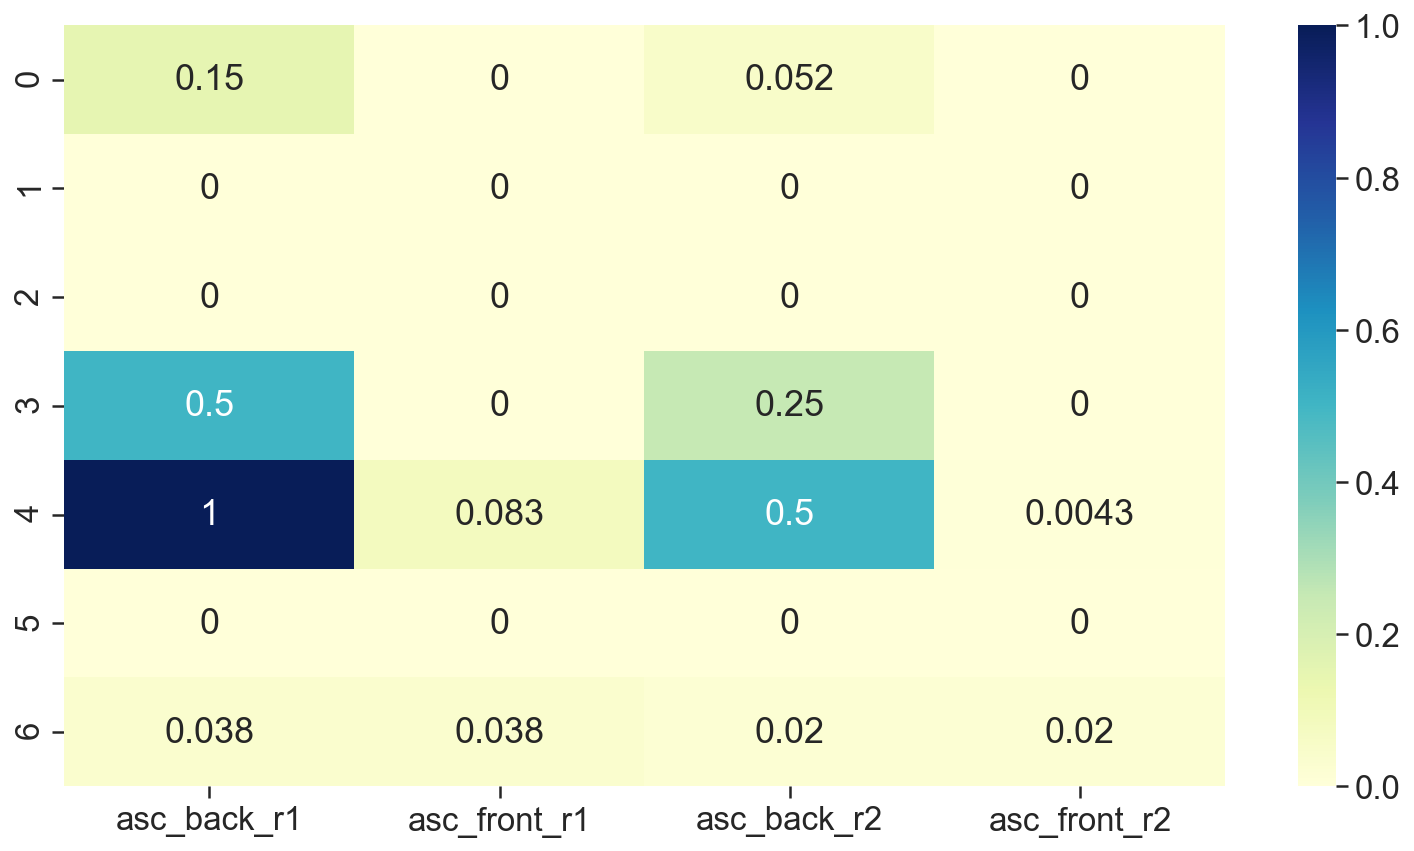

In [130]:
fig = plt.figure(figsize=(13, 7))


asc_heatmap = sns.heatmap(asc, cmap="YlGnBu", annot=True)

##### Scatter - Back-end  - Subcharacteristic - R1


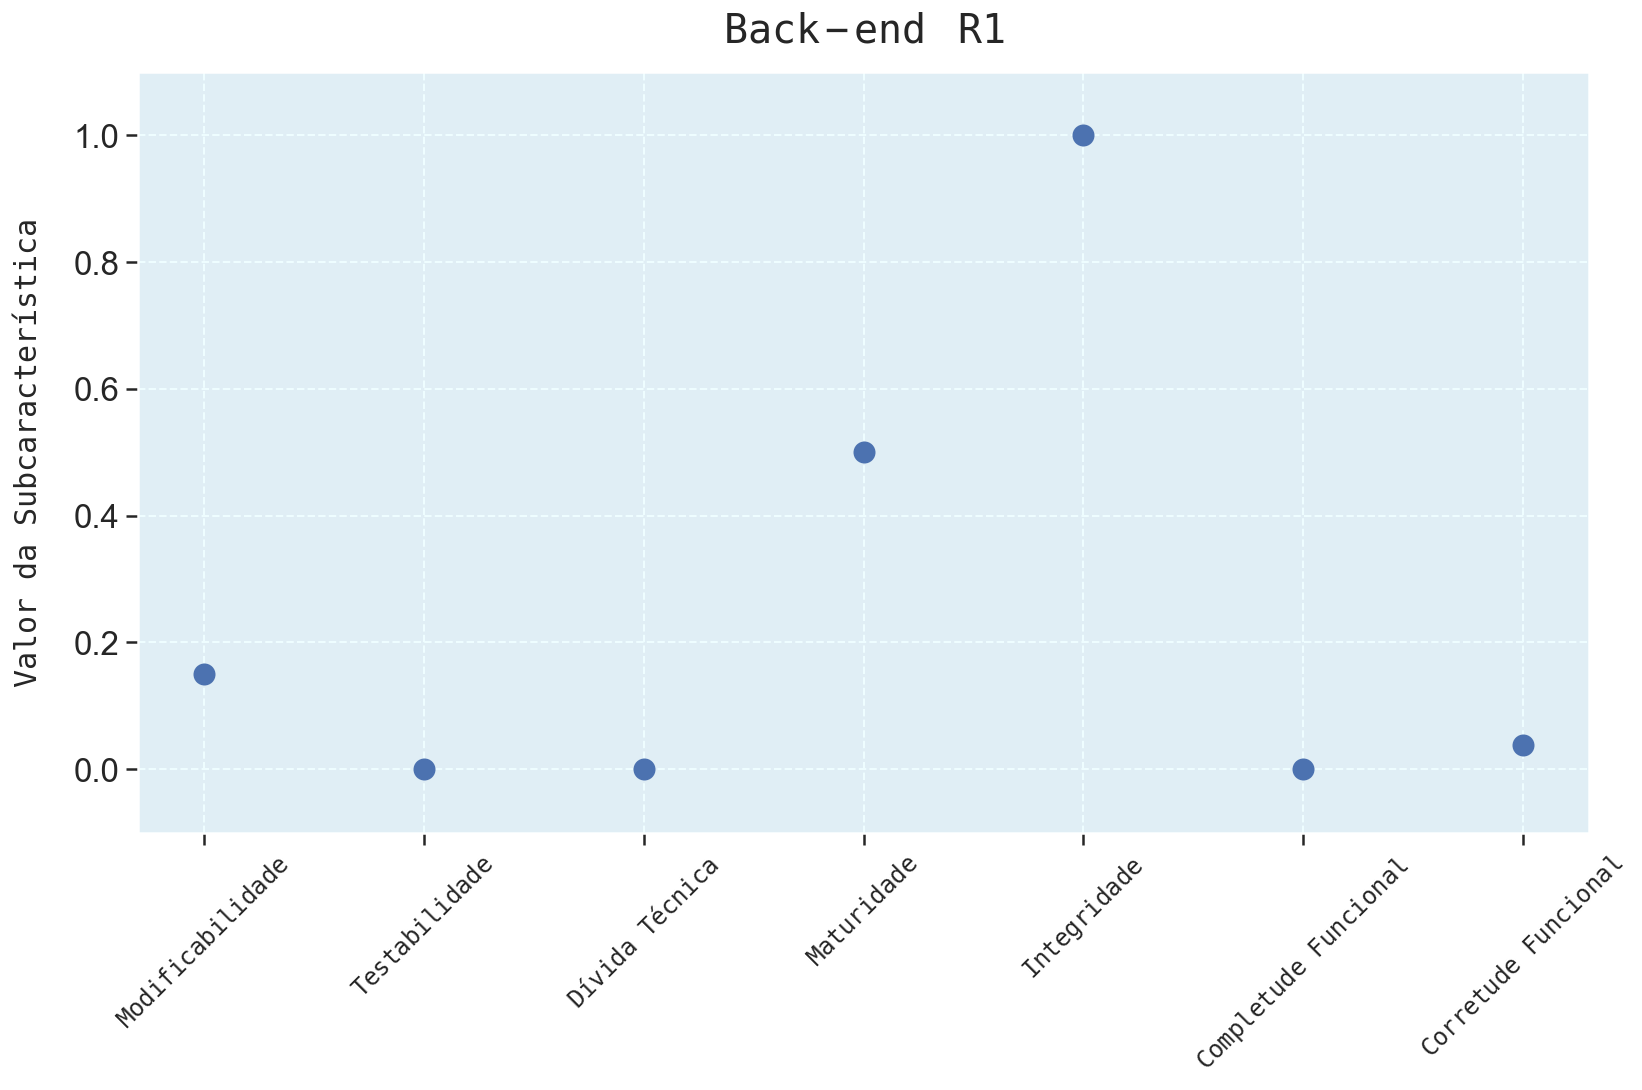

In [131]:
fig = plt.figure(figsize=(13, 7))


plt.plot(asc["asc_back_r1"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Back-end\ \ \ \ R1}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Subcaracterística}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3,4,5,6]
x_label = ['$\mathtt{Modificabilidade}$',
           '$\mathtt{Testabilidade}$',
           '$\mathtt{Dívida\ \ \ Técnica}$',
           '$\mathtt{Maturidade}$',
           '$\mathtt{Integridade}$',
           '$\mathtt{Completude\ \ \ Funcional}$',
           '$\mathtt{Corretude\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

##### Scatter - Front-end  - Subcharacteristic - R1


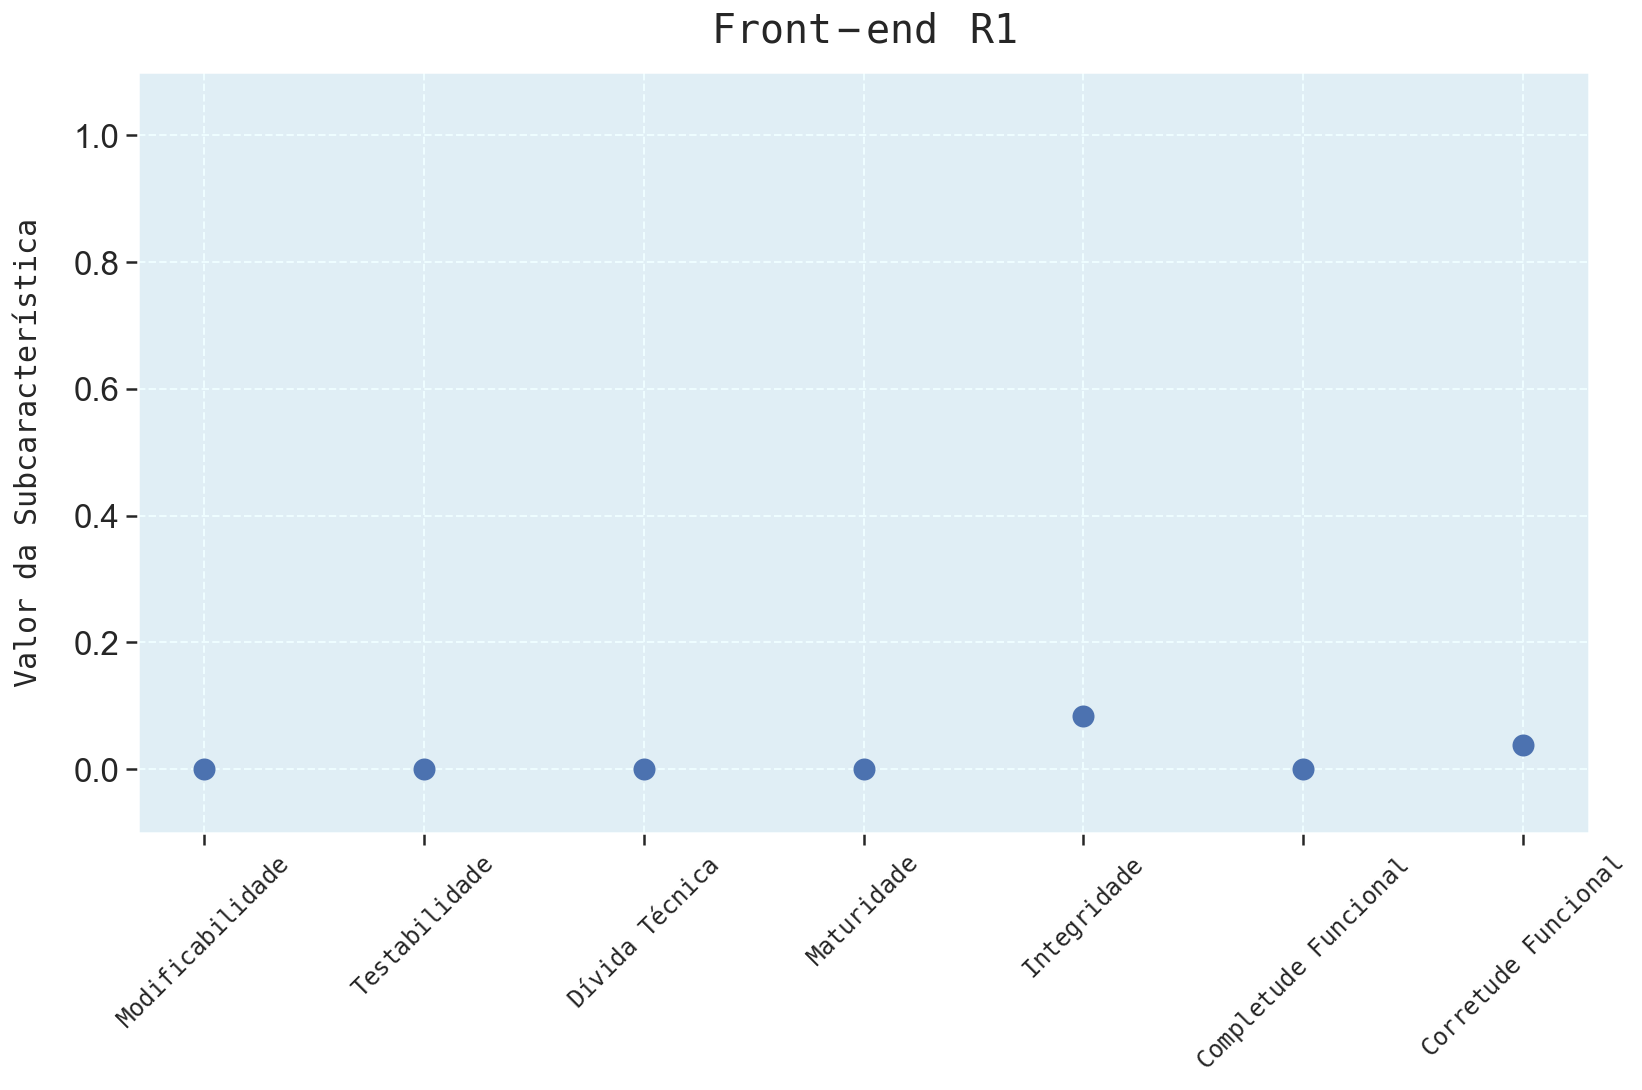

In [132]:
fig = plt.figure(figsize=(13, 7))


plt.plot(asc["asc_front_r1"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Front-end\ \ \ \ R1}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Subcaracterística}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3,4,5,6]
x_label = ['$\mathtt{Modificabilidade}$',
           '$\mathtt{Testabilidade}$',
           '$\mathtt{Dívida\ \ \ Técnica}$',
           '$\mathtt{Maturidade}$',
           '$\mathtt{Integridade}$',
           '$\mathtt{Completude\ \ \ Funcional}$',
           '$\mathtt{Corretude\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

##### Scatter - Back-end  - Subcharacteristic - R2

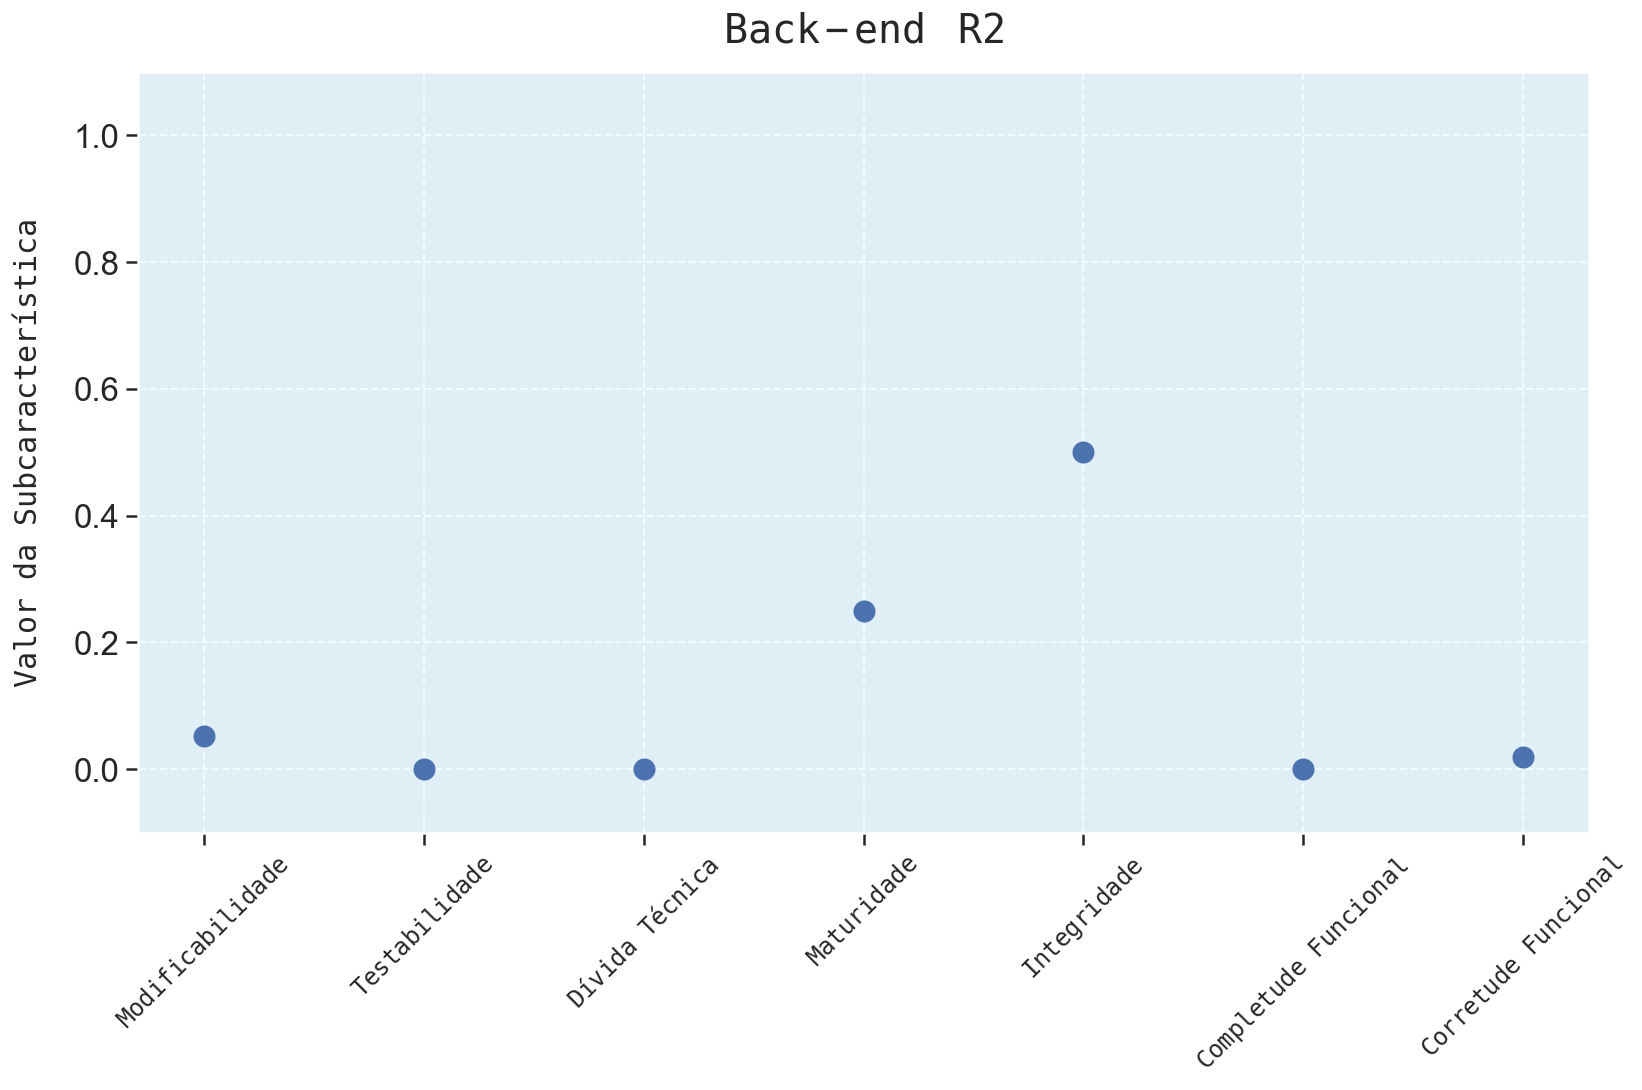

In [133]:
fig = plt.figure(figsize=(13, 7))


plt.plot(asc["asc_back_r2"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Back-end\ \ \ \ R2}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Subcaracterística}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3,4,5,6]
x_label = ['$\mathtt{Modificabilidade}$',
           '$\mathtt{Testabilidade}$',
           '$\mathtt{Dívida\ \ \ Técnica}$',
           '$\mathtt{Maturidade}$',
           '$\mathtt{Integridade}$',
           '$\mathtt{Completude\ \ \ Funcional}$',
           '$\mathtt{Corretude\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

##### Scatter - Front-end  - Subcharacteristic - R2


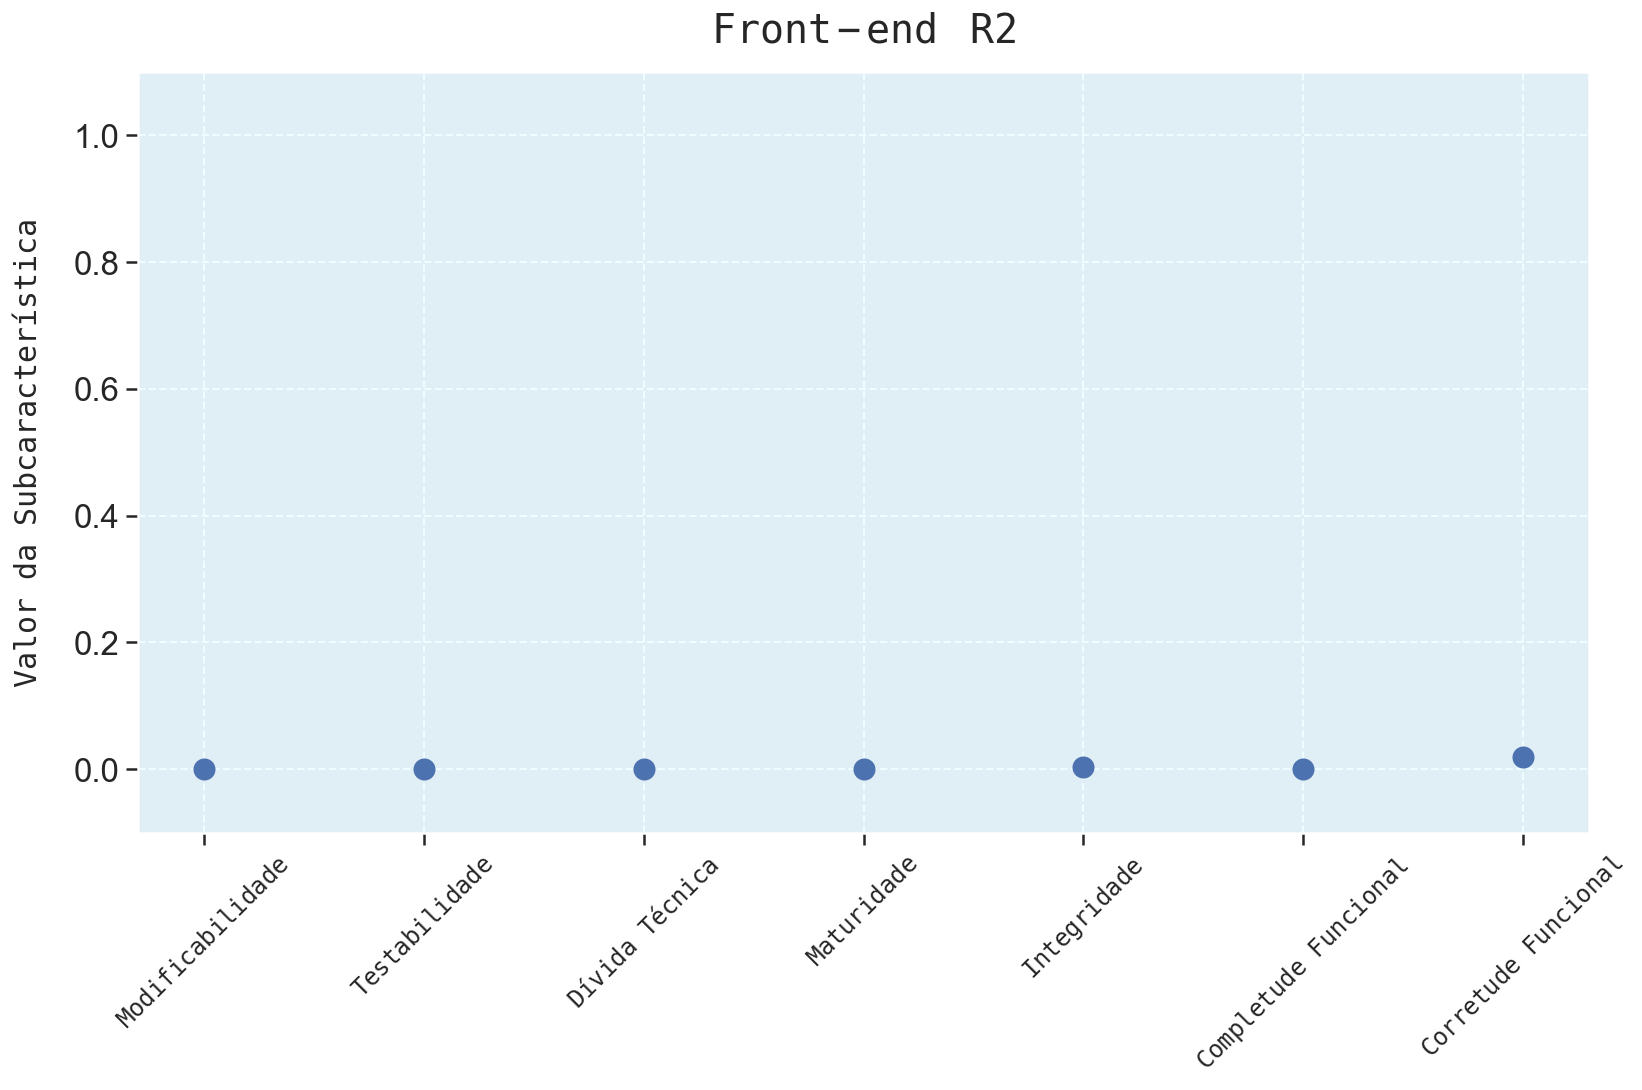

In [134]:
fig = plt.figure(figsize=(13, 7))


plt.plot(asc["asc_front_r2"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Front-end\ \ \ \ R2}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Subcaracterística}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3,4,5,6]
x_label = ['$\mathtt{Modificabilidade}$',
           '$\mathtt{Testabilidade}$',
           '$\mathtt{Dívida\ \ \ Técnica}$',
           '$\mathtt{Maturidade}$',
           '$\mathtt{Integridade}$',
           '$\mathtt{Completude\ \ \ Funcional}$',
           '$\mathtt{Corretude\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

### ac

In [135]:
ac_b1 = [ac1_b1,ac2_b1,ac3_b1,ac4_b1]
ac_f1 = [ac1_f1,ac2_f1,ac3_f1,ac4_f1]
ac_b2 = [ac1_b2,ac2_b2,ac3_b2,ac4_b2]
ac_f2 = [ac1_f2,ac2_f2,ac3_f2,ac4_f2]

In [136]:
ac = pd.DataFrame([ac_b1, ac_f1, ac_b2, ac_f2]).T
ac.columns = ['ac_back_r1','ac_front_r1','ac_back_r2','ac_front_r2']

In [137]:
ac

,ac_back_r1,ac_front_r1,ac_back_r2,ac_front_r2
0,0.030025,0.000000,0.010454,0.000000
1,0.100000,0.000000,0.050000,0.000000
2,0.200000,0.016667,0.100000,0.000855
3,0.000000,0.000000,0.000000,0.000000


##### Heatmap - ac

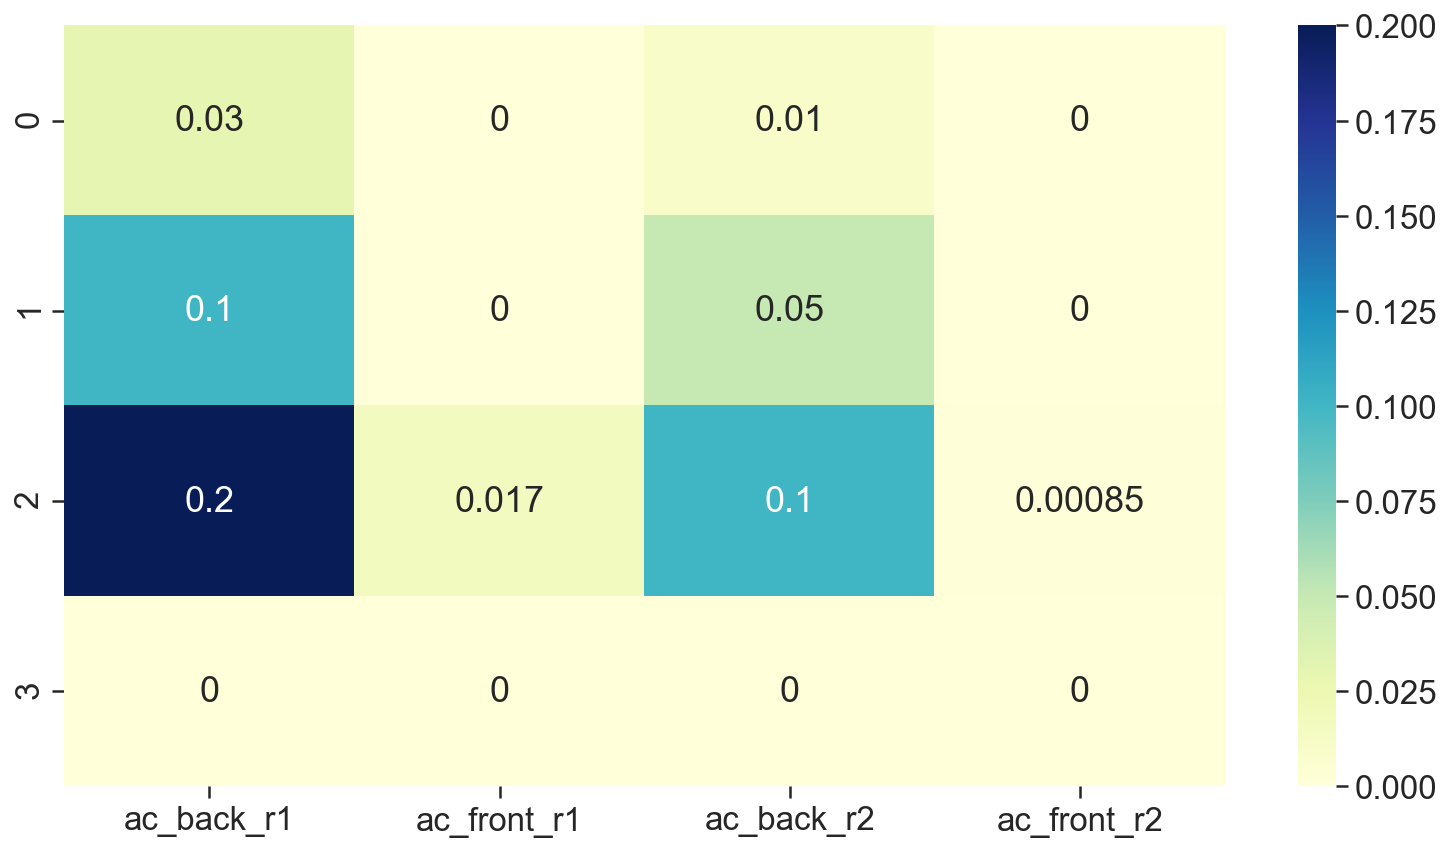

In [138]:
fig = plt.figure(figsize=(13, 7))


asc_heatmap = sns.heatmap(ac, cmap="YlGnBu", annot=True)

##### Scatter - Back-end  - Characteristic - R1

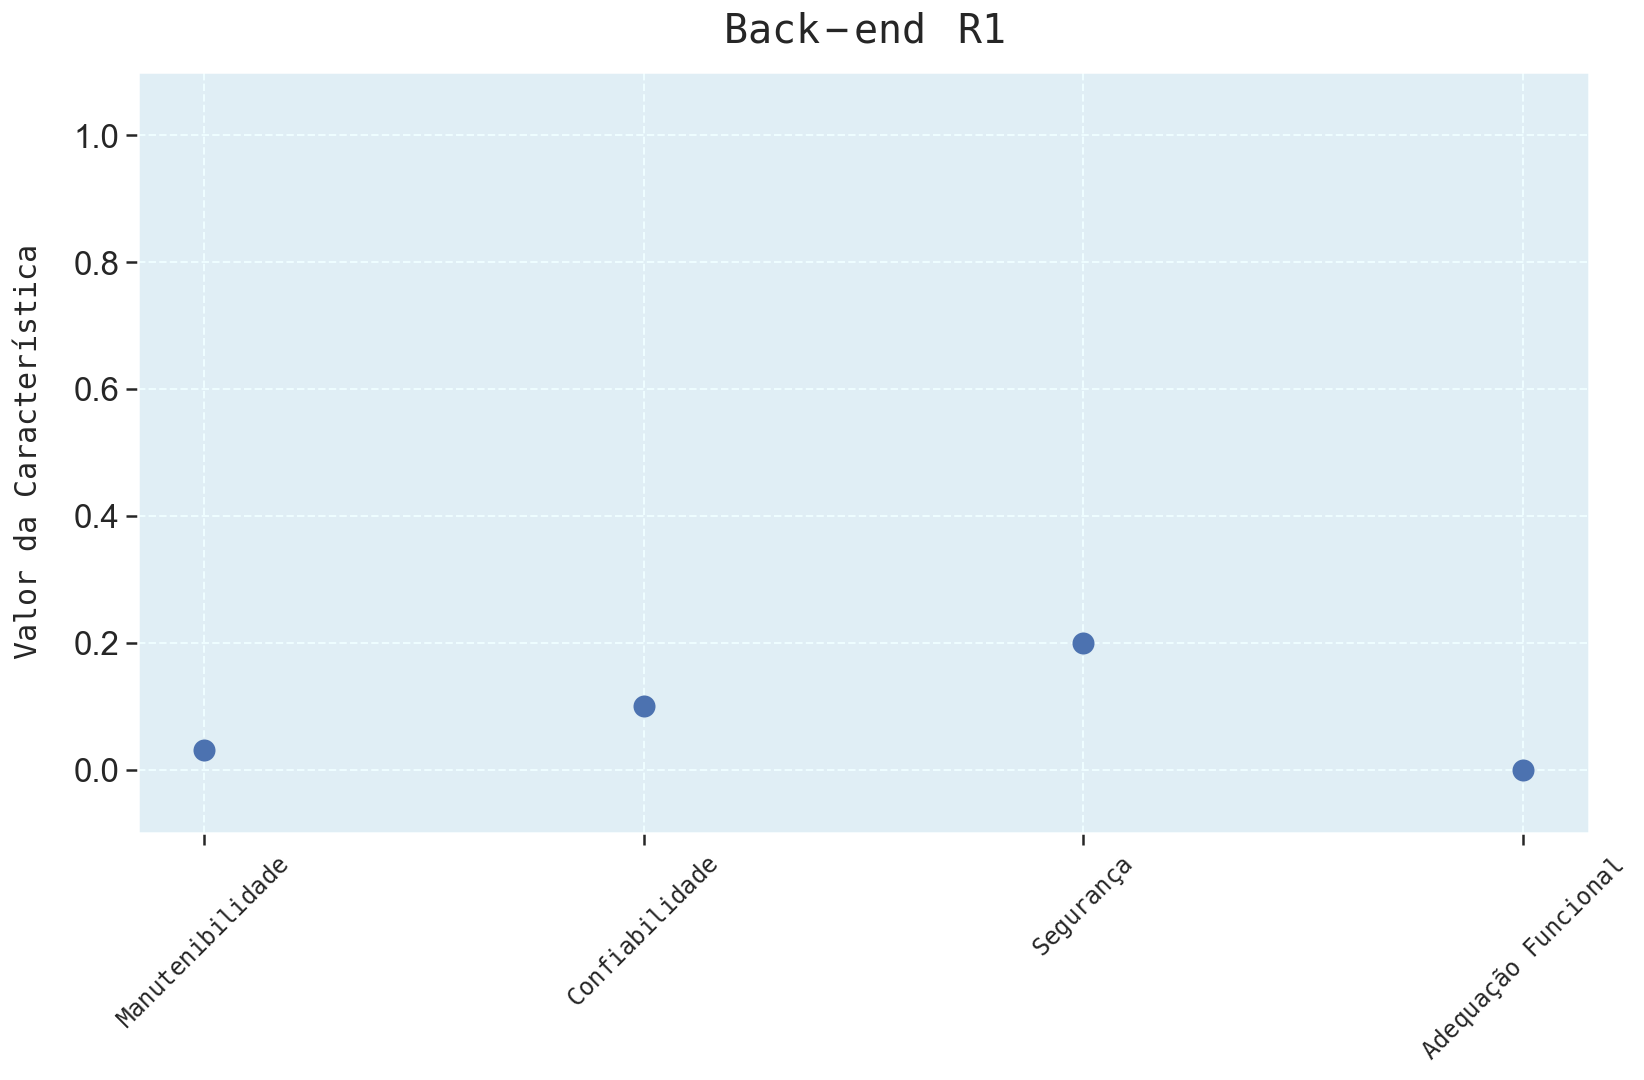

In [139]:
fig = plt.figure(figsize=(13, 7))


plt.plot(ac["ac_back_r1"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Back-end\ \ \ \ R1}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3]
x_label = ['$\mathtt{Manutenibilidade}$',
           '$\mathtt{Confiabilidade}$',
           '$\mathtt{Segurança}$',
           '$\mathtt{Adequação\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

##### Scatter - Front-end  - Characteristic - R1

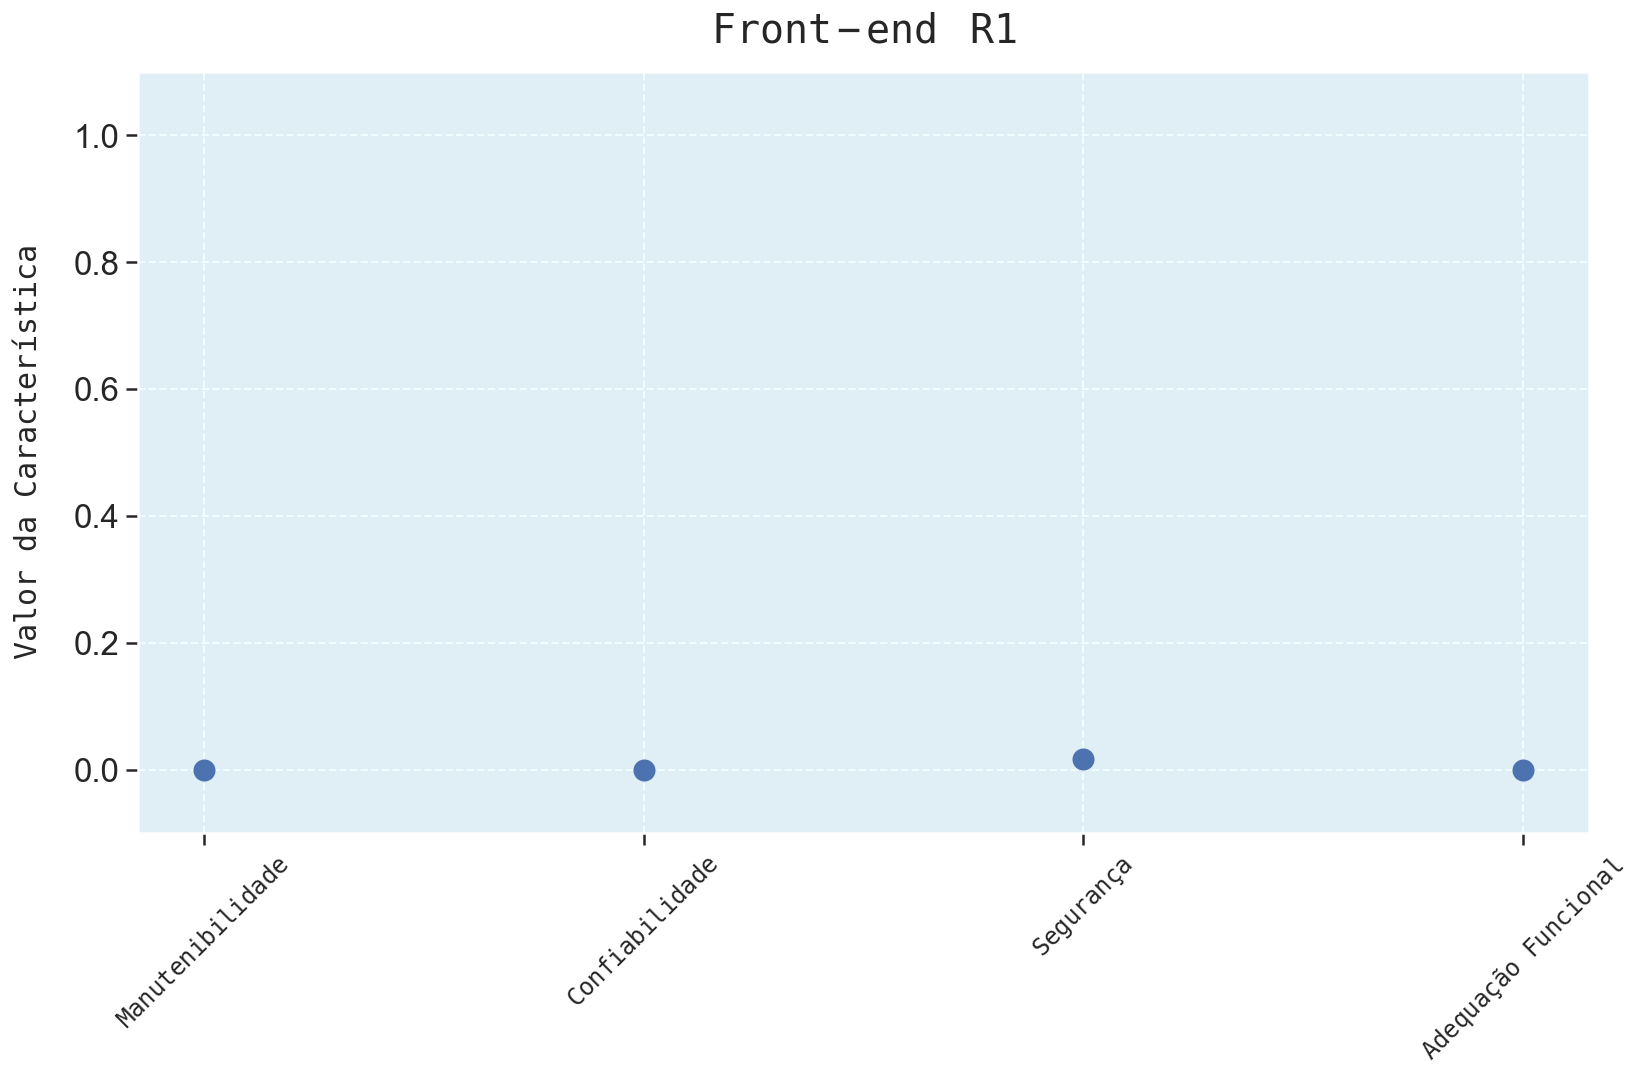

In [140]:
fig = plt.figure(figsize=(13, 7))


plt.plot(ac["ac_front_r1"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Front-end\ \ \ \ R1}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3]
x_label = ['$\mathtt{Manutenibilidade}$',
           '$\mathtt{Confiabilidade}$',
           '$\mathtt{Segurança}$',
           '$\mathtt{Adequação\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

##### Scatter - Back-end  - Characteristic - R2

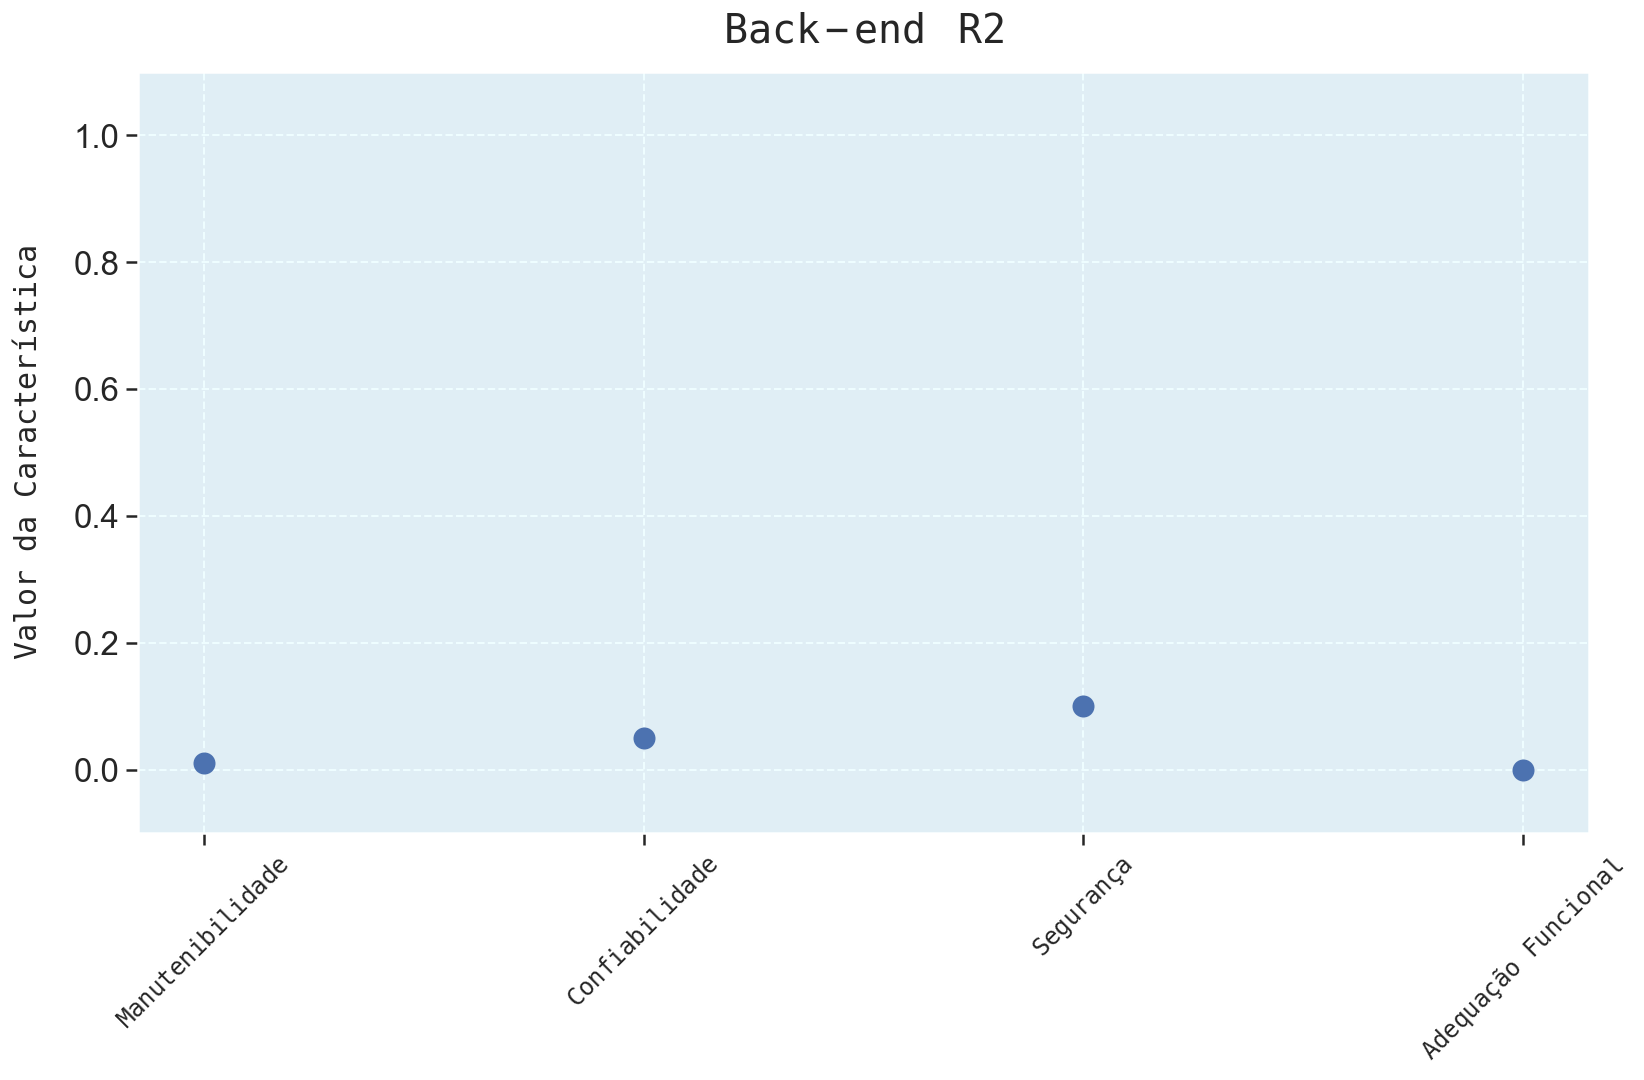

In [141]:
fig = plt.figure(figsize=(13, 7))


plt.plot(ac["ac_back_r2"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Back-end\ \ \ \ R2}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3]
x_label = ['$\mathtt{Manutenibilidade}$',
           '$\mathtt{Confiabilidade}$',
           '$\mathtt{Segurança}$',
           '$\mathtt{Adequação\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

##### Scatter - Front-end  - Characteristic - R2

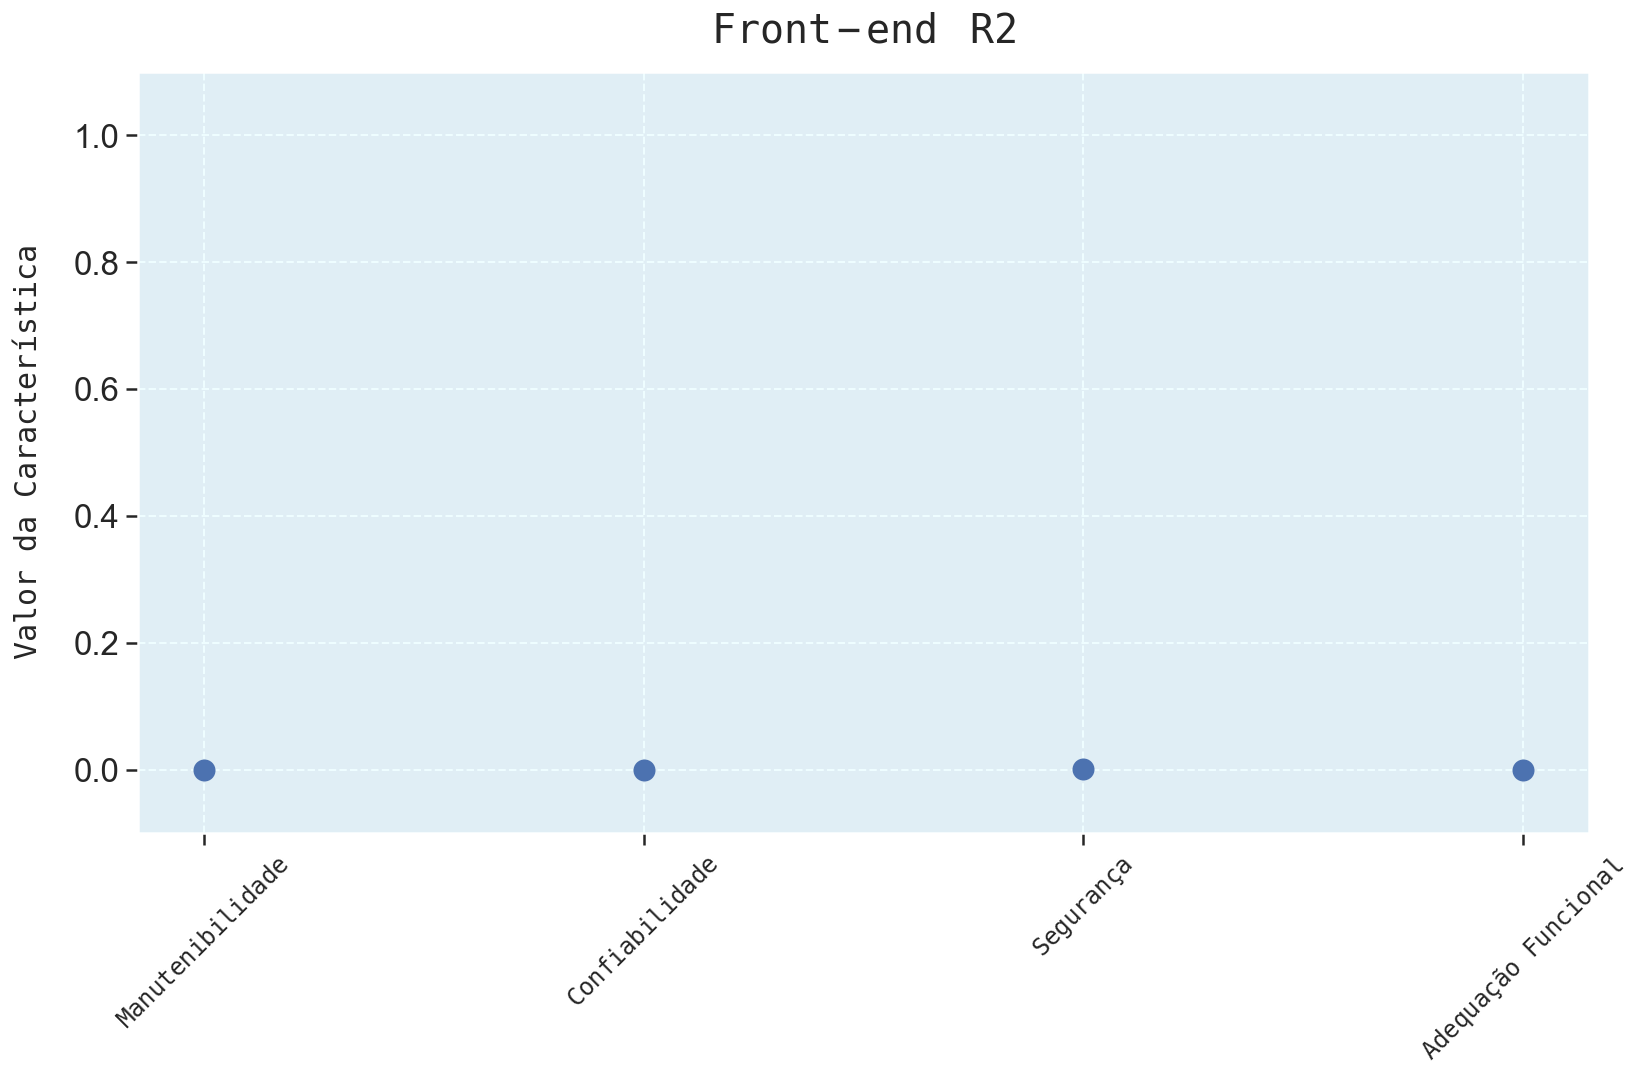

In [142]:
fig = plt.figure(figsize=(13, 7))


plt.plot(ac["ac_front_r2"], marker='o', ms=10, linewidth=0)

plt.title("$\mathtt{Front-end\ \ \ \ R2}$",
          fontsize=20,
          pad=15,
          weight='bold')

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3]
x_label = ['$\mathtt{Manutenibilidade}$',
           '$\mathtt{Confiabilidade}$',
           '$\mathtt{Segurança}$',
           '$\mathtt{Adequação\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

## Comparisons 

#### Subcharacteristics 

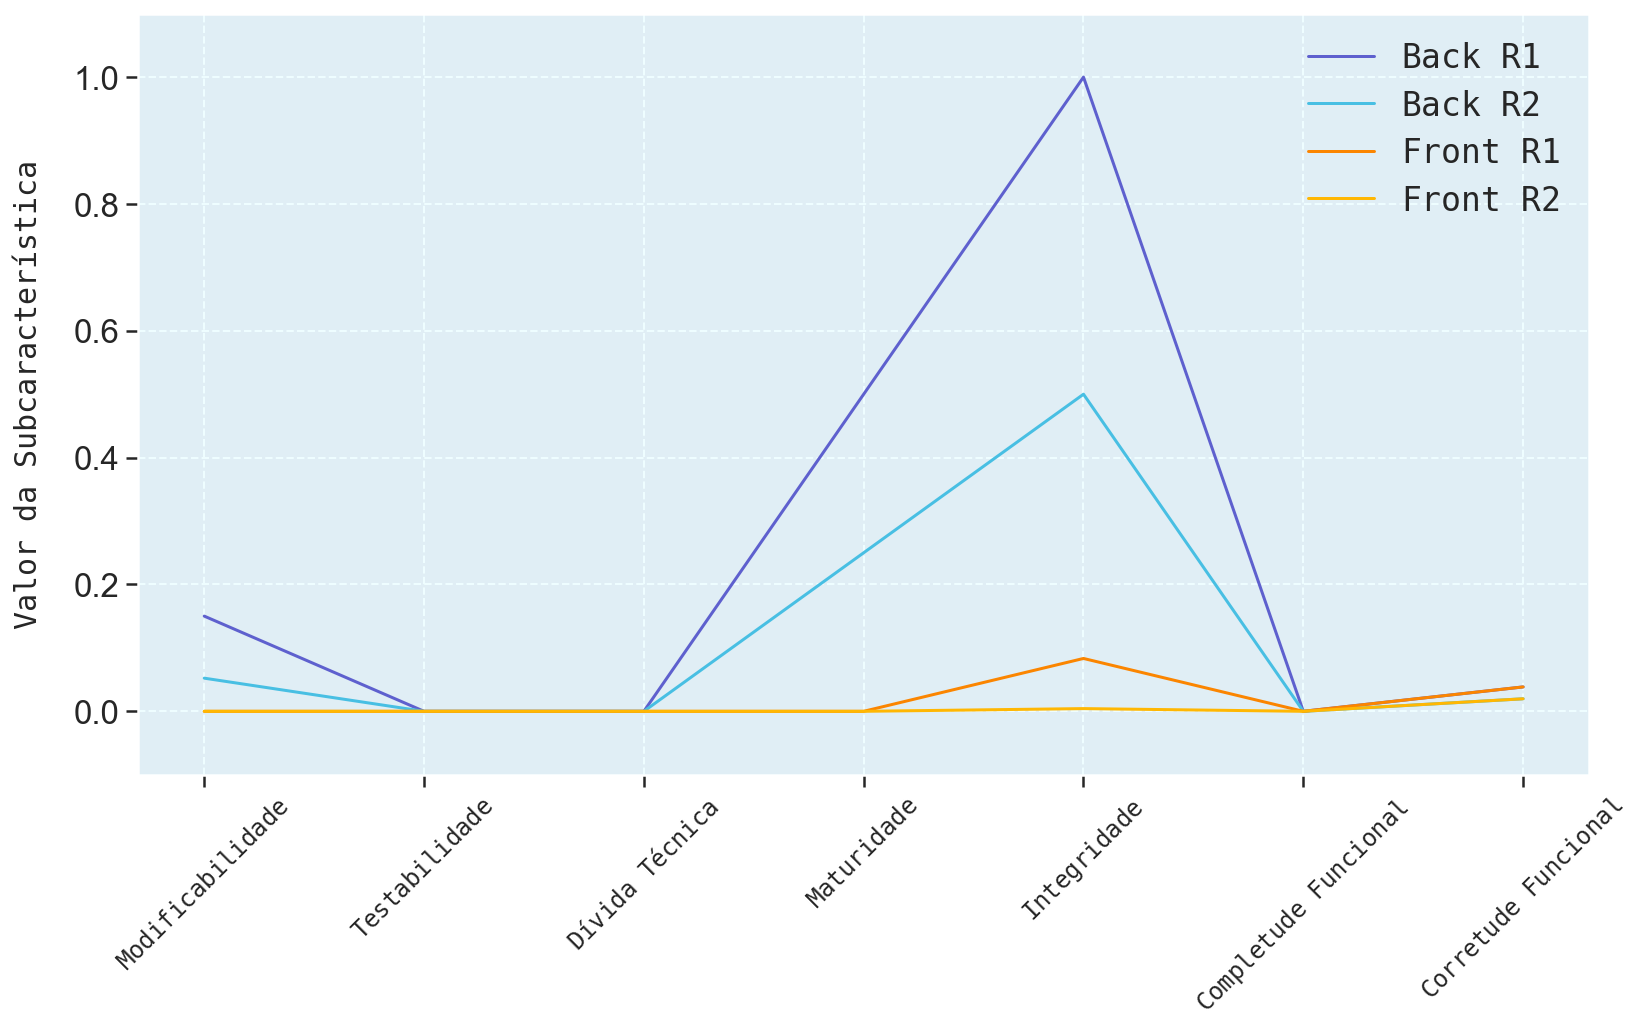

In [143]:
fig = plt.figure(figsize=(13, 7))

plt.plot(asc['asc_back_r1'], c='#5e60ce', label="$\mathtt{Back\ \ \ R1}$")
plt.plot(asc['asc_back_r2'], c='#48bfe3', label="$\mathtt{Back\ \ \ R2}$")
plt.plot(asc['asc_front_r1'], c='#fb8500', label="$\mathtt{Front\ \ \ R1}$")
plt.plot(asc['asc_front_r2'], c='#ffb703', label="$\mathtt{Front\ \ \ R2}$")

plt.legend(framealpha=0, fancybox= True)

plt.axhspan(-0.1, 1.1, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.1, 1.1)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Subcaracterística}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3,4,5,6]
x_label = ['$\mathtt{Modificabilidade}$',
           '$\mathtt{Testabilidade}$',
           '$\mathtt{Dívida\ \ \ Técnica}$',
           '$\mathtt{Maturidade}$',
           '$\mathtt{Integridade}$',
           '$\mathtt{Completude\ \ \ Funcional}$',
           '$\mathtt{Corretude\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

#### Characteristics 

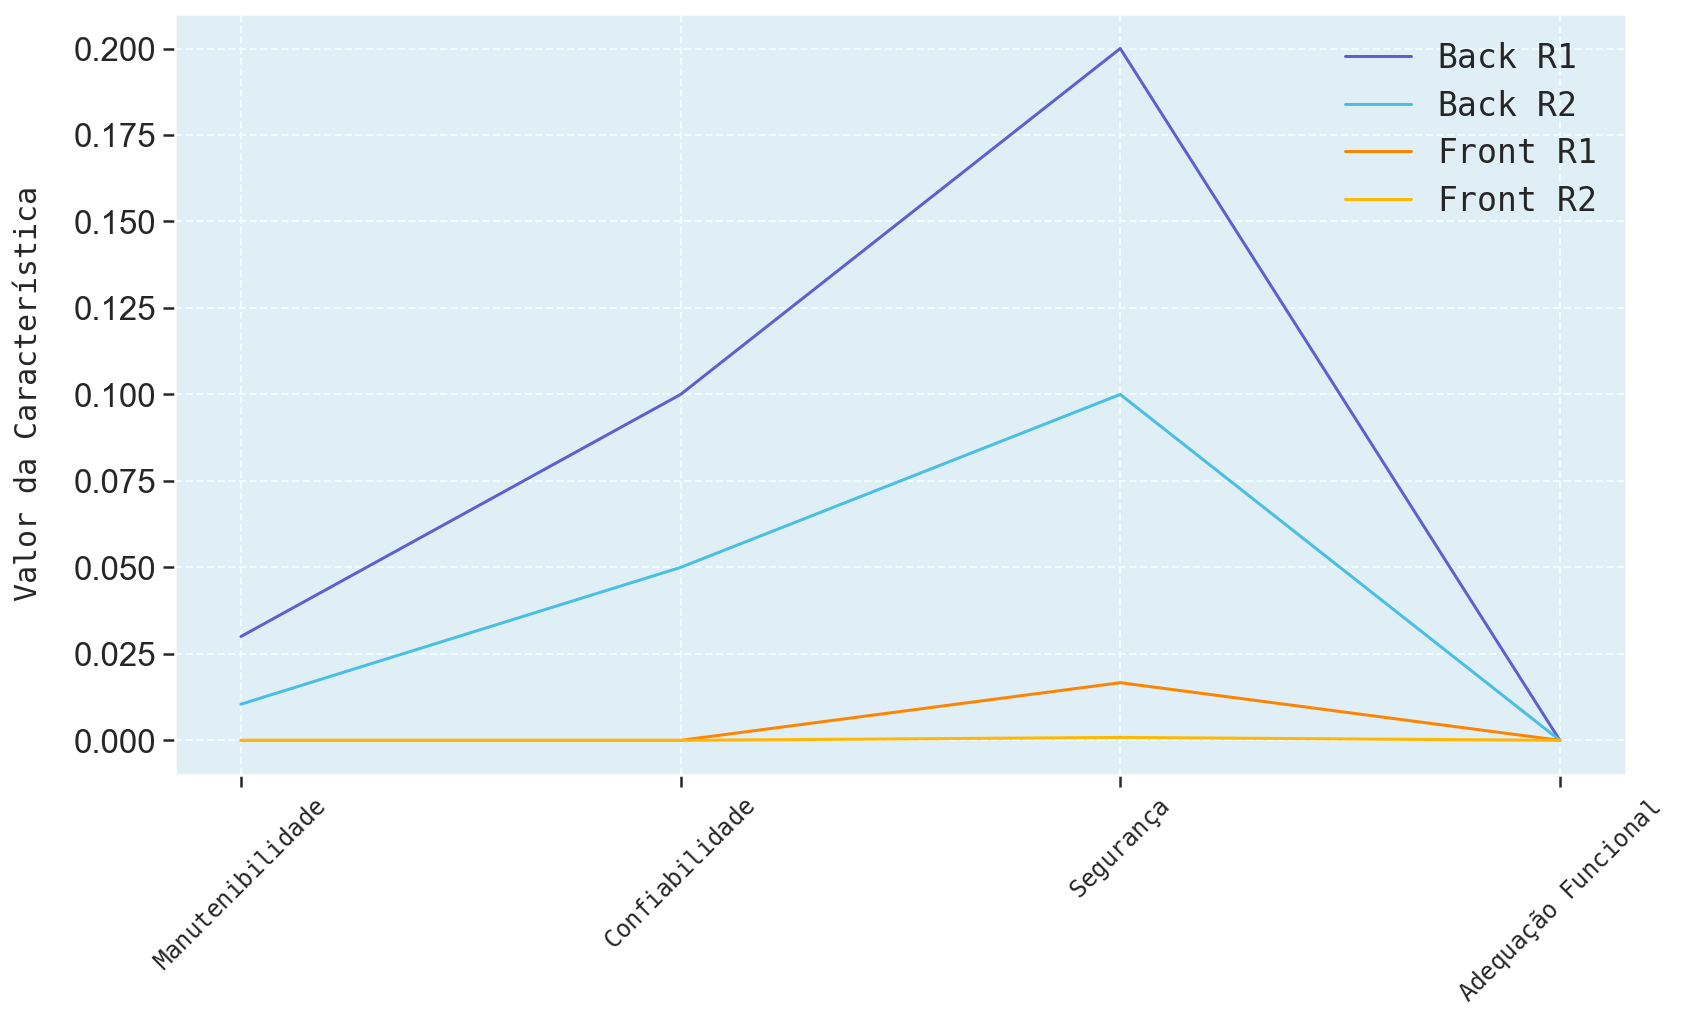

In [144]:
fig = plt.figure(figsize=(13, 7))

plt.plot(ac['ac_back_r1'], c='#5e60ce', label="$\mathtt{Back\ \ \ R1}$")
plt.plot(ac['ac_back_r2'], c='#48bfe3', label="$\mathtt{Back\ \ \ R2}$")
plt.plot(ac['ac_front_r1'], c='#fb8500', label="$\mathtt{Front\ \ \ R1}$")
plt.plot(ac['ac_front_r2'], c='#ffb703', label="$\mathtt{Front\ \ \ R2}$")

plt.legend(framealpha=0, fancybox= True)

plt.axhspan(-0.01, 0.21, color="#c9f9ff", alpha=0.3)
plt.ylim(-0.01, 0.21)

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

x = [0,1,2,3]
x_label = ['$\mathtt{Manutenibilidade}$',
           '$\mathtt{Confiabilidade}$',
           '$\mathtt{Segurança}$',
           '$\mathtt{Adequação\ \ \ Funcional}$']

plt.xticks(x, x_label, rotation=45, fontsize=12)

plt.show()

### Release 1 vs. Release 2

- As observações relacionadas à característica Adequação Funcional está zerada, portanto não será plotada. Assim como as relacionadas às características de Manutenibilidade e Confiabilidade no Front-end

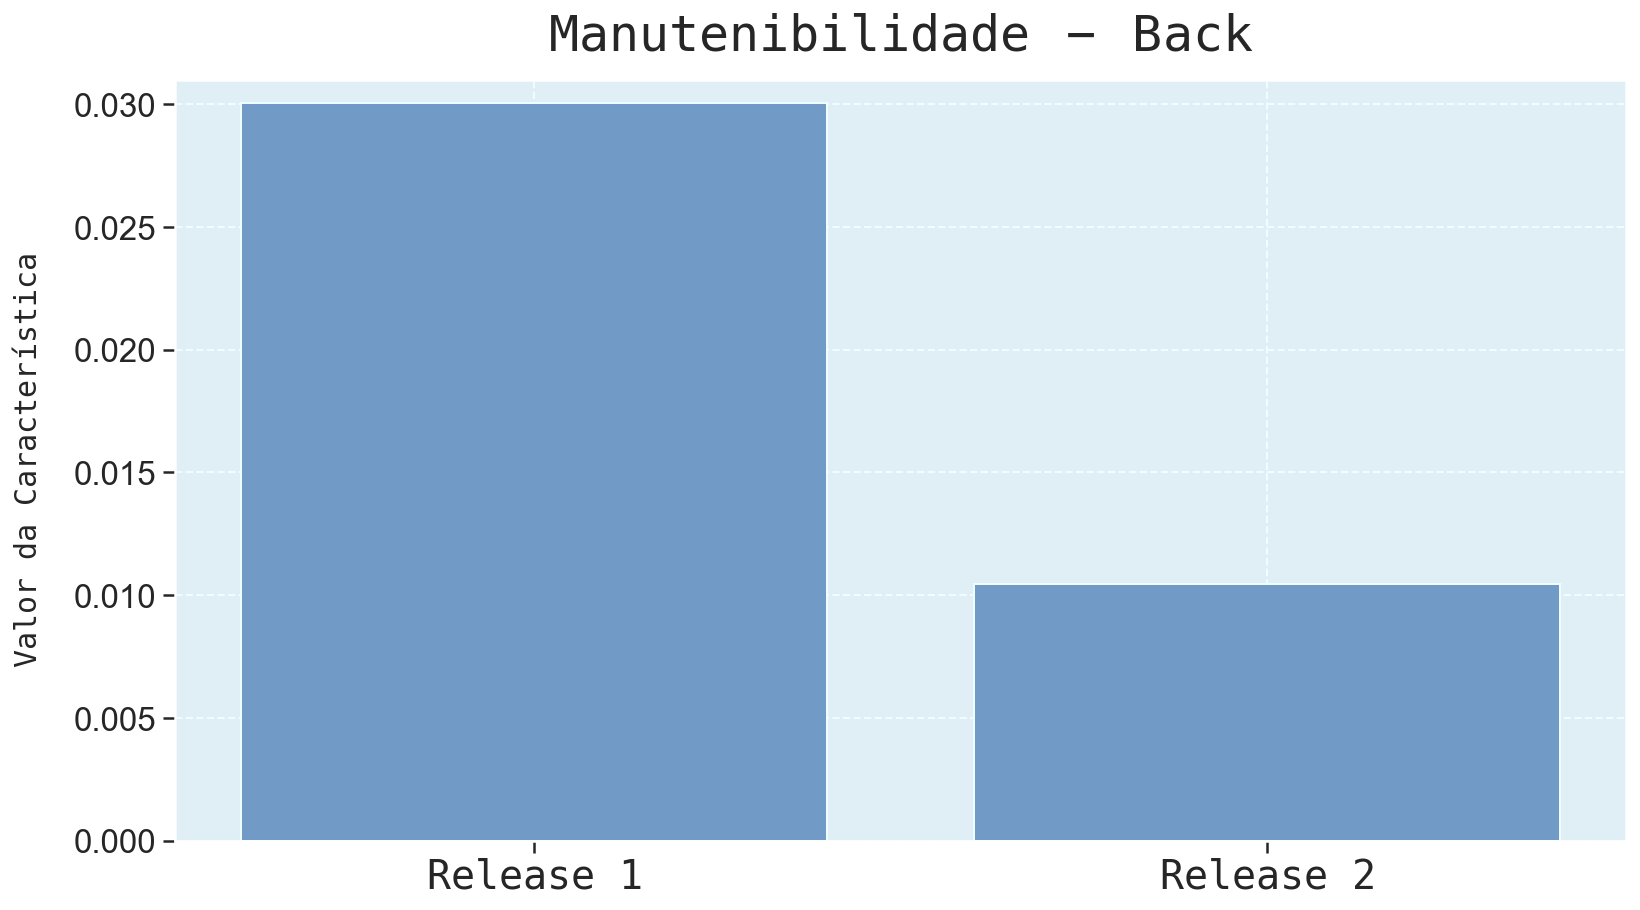

In [145]:
fig = plt.figure(figsize=(13, 7))

height = list([ac['ac_back_r1'].iloc[0],ac['ac_back_r2'].iloc[0]])
y_pos = np.arange(len(height))
 

plt.bar(y_pos, height)

plt.title("$\mathtt{Manutenibilidade\ \ \ -\ \ \ Back}$",
           fontsize=25,
           pad=15,
           weight='bold')

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

plt.axhspan(0, 0.031, color="#c9f9ff", alpha=0.3)
plt.ylim(0, 0.031)

x = [0,1]
x_label = ['$\mathtt{Release\ \ \ 1}$',
           '$\mathtt{Release\ \ \ 2}$']

plt.xticks(x, x_label, fontsize=20)

plt.show()

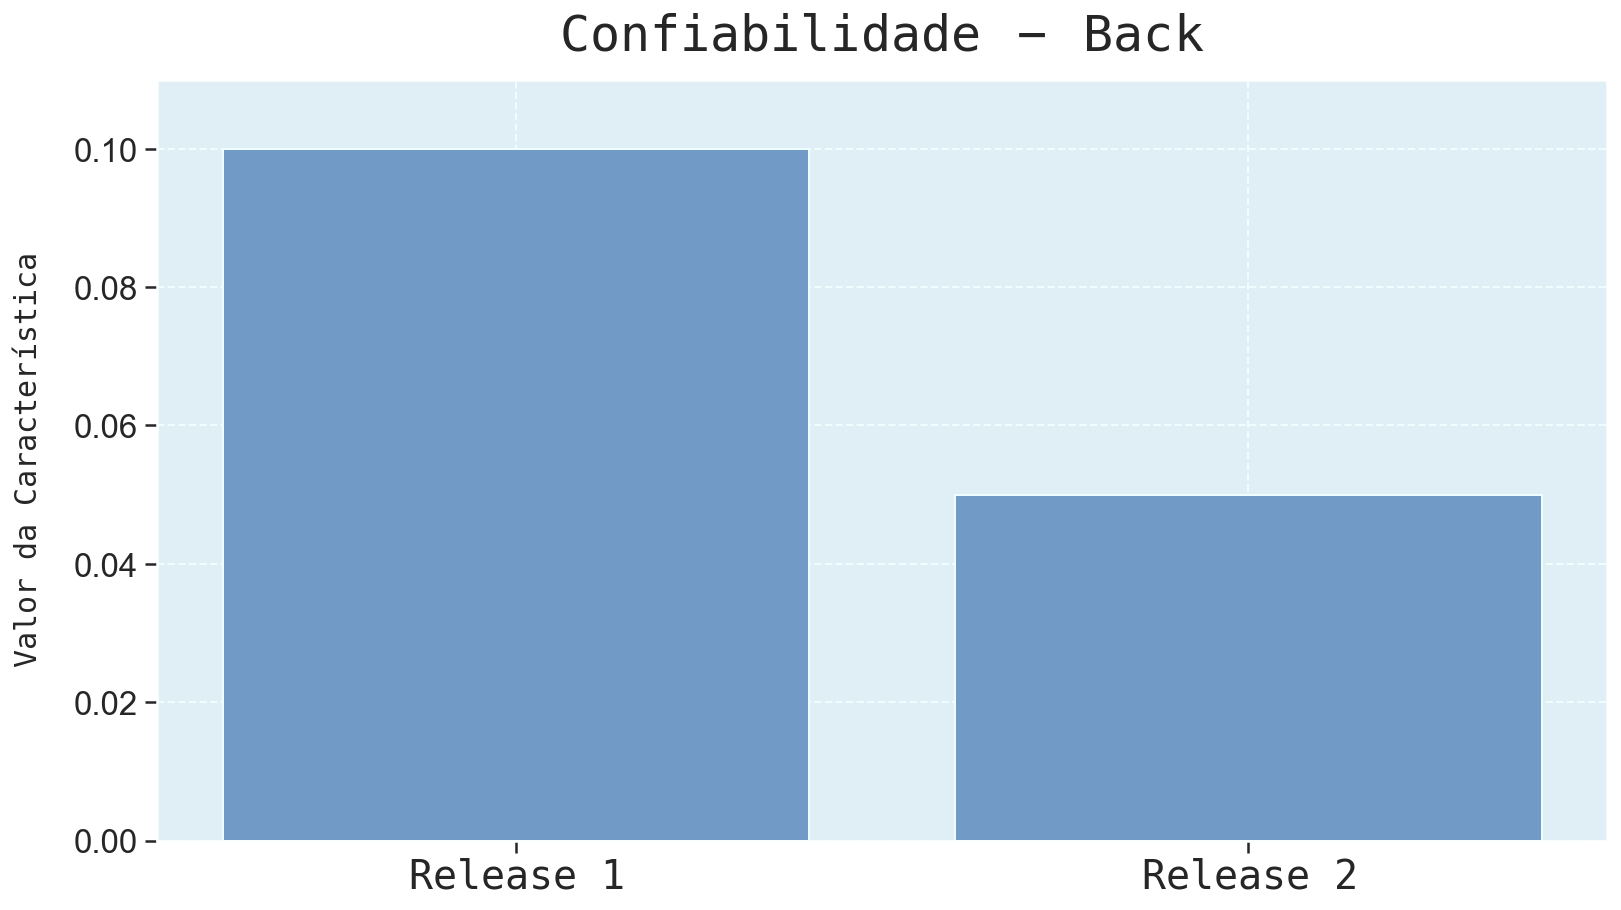

In [146]:
fig = plt.figure(figsize=(13, 7))

height = list([ac['ac_back_r1'].iloc[1],ac['ac_back_r2'].iloc[1]])
y_pos = np.arange(len(height))
 

plt.bar(y_pos, height)

plt.title("$\mathtt{Confiabilidade\ \ \ -\ \ \ Back}$",
           fontsize=25,
           pad=15,
           weight='bold')

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

plt.axhspan(0, 0.11, color="#c9f9ff", alpha=0.3)
plt.ylim(0, 0.11)

x = [0,1]
x_label = ['$\mathtt{Release\ \ \ 1}$',
           '$\mathtt{Release\ \ \ 2}$']

plt.xticks(x, x_label, fontsize=20)

plt.show()

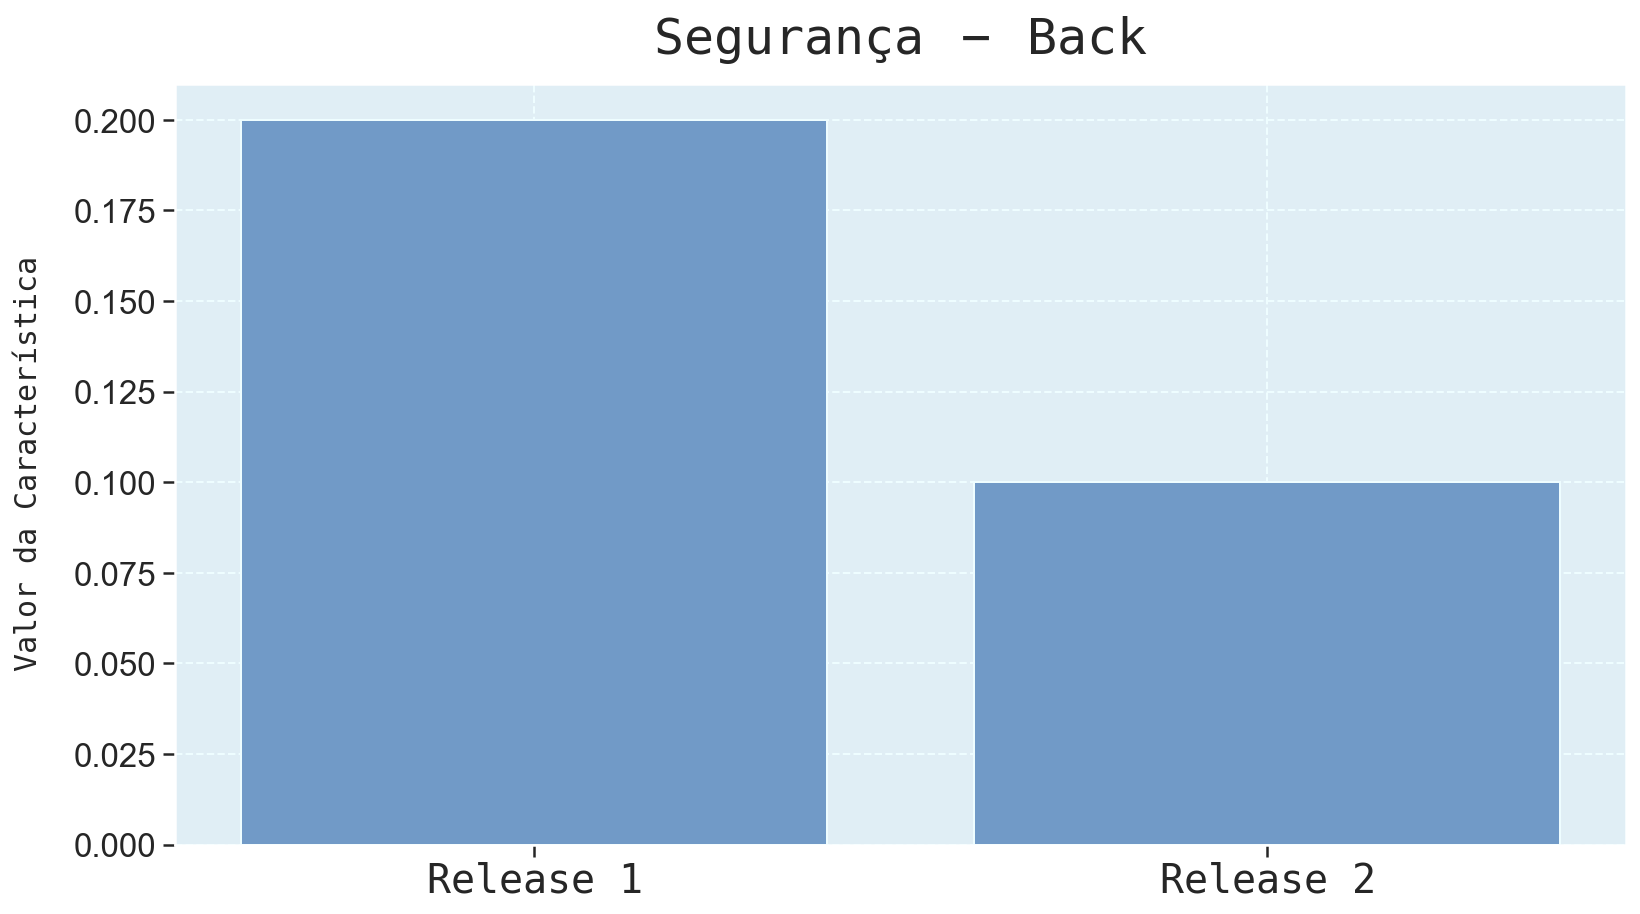

In [147]:
fig = plt.figure(figsize=(13, 7))

height = list([ac['ac_back_r1'].iloc[2],ac['ac_back_r2'].iloc[2]])
y_pos = np.arange(len(height))
 

plt.bar(y_pos, height)

plt.title("$\mathtt{Segurança\ \ \ -\ \ \ Back}$",
           fontsize=25,
           pad=15,
           weight='bold')

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

plt.axhspan(0, 0.21, color="#c9f9ff", alpha=0.3)
plt.ylim(0, 0.21)

x = [0,1]
x_label = ['$\mathtt{Release\ \ \ 1}$',
           '$\mathtt{Release\ \ \ 2}$']

plt.xticks(x, x_label, fontsize=20)

plt.show()

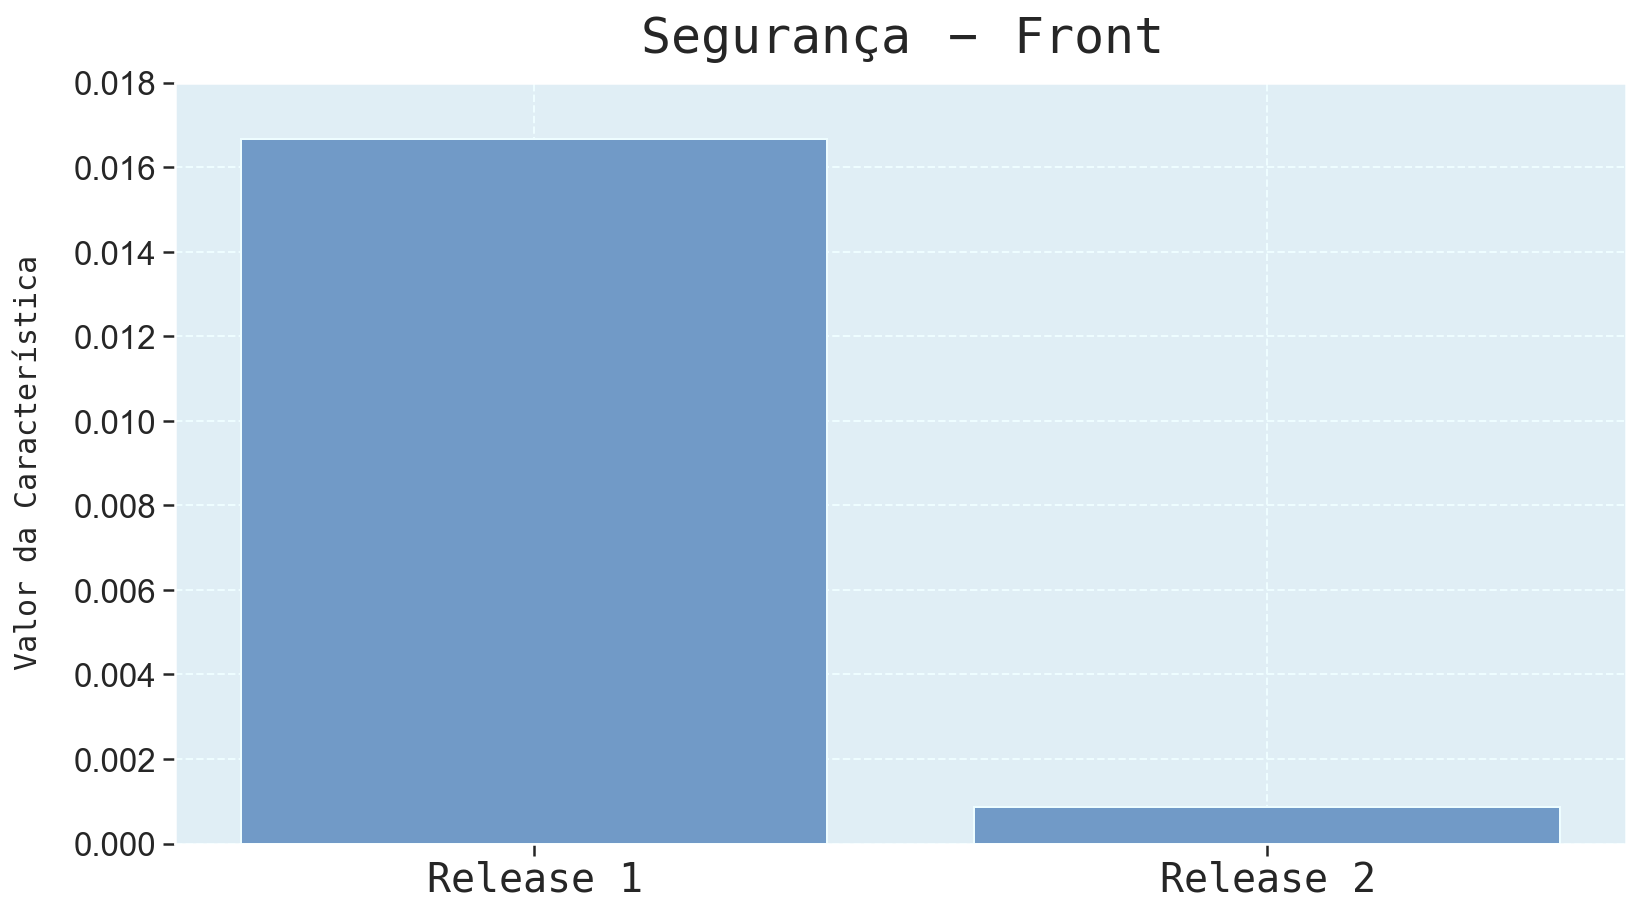

In [148]:
fig = plt.figure(figsize=(13, 7))

height = list([ac['ac_front_r1'].iloc[2],ac['ac_front_r2'].iloc[2]])
y_pos = np.arange(len(height))
 

plt.bar(y_pos, height)

plt.title("$\mathtt{Segurança\ \ \ -\ \ \ Front}$",
           fontsize=25,
           pad=15,
           weight='bold')

plt.ylabel("$\mathtt{Valor\ \ \ da\ \ \ Característica}$",
           fontsize=15,
           labelpad=15,
           weight='bold')

plt.axhspan(0, 0.018, color="#c9f9ff", alpha=0.3)
plt.ylim(0, 0.018)

x = [0,1]
x_label = ['$\mathtt{Release\ \ \ 1}$',
           '$\mathtt{Release\ \ \ 2}$']

plt.xticks(x, x_label, fontsize=20)

plt.show()

### Normal test

- Foi feito o teste de correlação de Spearmanr em consequência do número de observações existente no dataframe (7 subcaracterísticas e 3 características). O teste de Pearson necessariamente exige que haja no mínimo 8 observações no data frame.

- A análise de correlação será feita por repositório (back e front) comparando-se os dados das duas releases.

#### Subcharacteristic - Back

In [149]:
# seed random number generator
seed(1)

# calculate spearman's correlation
coef, p = spearmanr(asc['asc_back_r1'], asc['asc_back_r1'])
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.6f' % p)

Spearmans correlation coefficient: 1.000
Samples are correlated (reject H0) p=0.000000


#### Subcharacteristic - Front

In [150]:
# seed random number generator
seed(1)

# calculate spearman's correlation
coef, p = spearmanr(asc['asc_front_r1'], asc['asc_front_r2'])
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.6f' % p)

Spearmans correlation coefficient: 0.944
Samples are correlated (reject H0) p=0.001356


#### Characteristic - Back

In [151]:
# seed random number generator
seed(1)

# calculate spearman's correlation
coef, p = spearmanr(ac['ac_back_r1'], ac['ac_back_r2'])
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.6f' % p)

Spearmans correlation coefficient: 1.000
Samples are correlated (reject H0) p=0.000000


#### Characteristic - Front

In [152]:
# seed random number generator
seed(1)

# calculate spearman's correlation
coef, p = spearmanr(ac['ac_front_r1'], ac['ac_front_r2'])
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05

if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.6f' % p)

Spearmans correlation coefficient: 1.000
Samples are correlated (reject H0) p=0.000000


### Central Tendency Table

- Análise de ma1 por estatística descritiva

In [153]:
x = np.array([0, 5])
y = np.array([1, 0])

ctt_b1 = sum(np.interp(list(back_r1_df['complexity/functions'][(back_r1_df['functions'].astype(float) > 0)]), x, y))/len(back_r1_df)
ctt_f1 = sum(np.interp(list(front_r1_df['complexity/functions'][(front_r1_df['functions'].astype(float) > 0)]), x, y))/len(front_r1_df)
ctt_b2 = sum(np.interp(list(back_r2_df['complexity/functions'][(back_r2_df['functions'].astype(float) > 0)]), x, y))/len(back_r2_df)
ctt_f2 = sum(np.interp(list(front_r2_df['complexity/functions'][(front_r2_df['functions'].astype(float) > 0)]), x, y))/len(front_r2_df)

In [154]:
ctt_ma1 = list([ctt_b1,ctt_f1,ctt_b2,ctt_f2])

ctt_ma1 = pd.DataFrame(ctt_ma1)

ctt_ma1

,0
0,0.378571
1,0.378546
2,0.464516
3,0.386930


In [155]:
ctt_ma1_statistics = ctt_ma1.describe()

ctt_ma1_statistics = ctt_ma1_statistics.append([ctt_ma1.median(), ctt_ma1.var()])

ctt_ma1_statistics.index.values[8] = 'median'

ctt_ma1_statistics.index.values[9] = ('var')
ctt_ma1_statistics

,0
count,4.000000
mean,0.402141
std,0.041770
min,0.378546
25%,0.378565
50%,0.382751
75%,0.406326
max,0.464516
median,0.382751
var,0.001745


##### Box plot - ma1

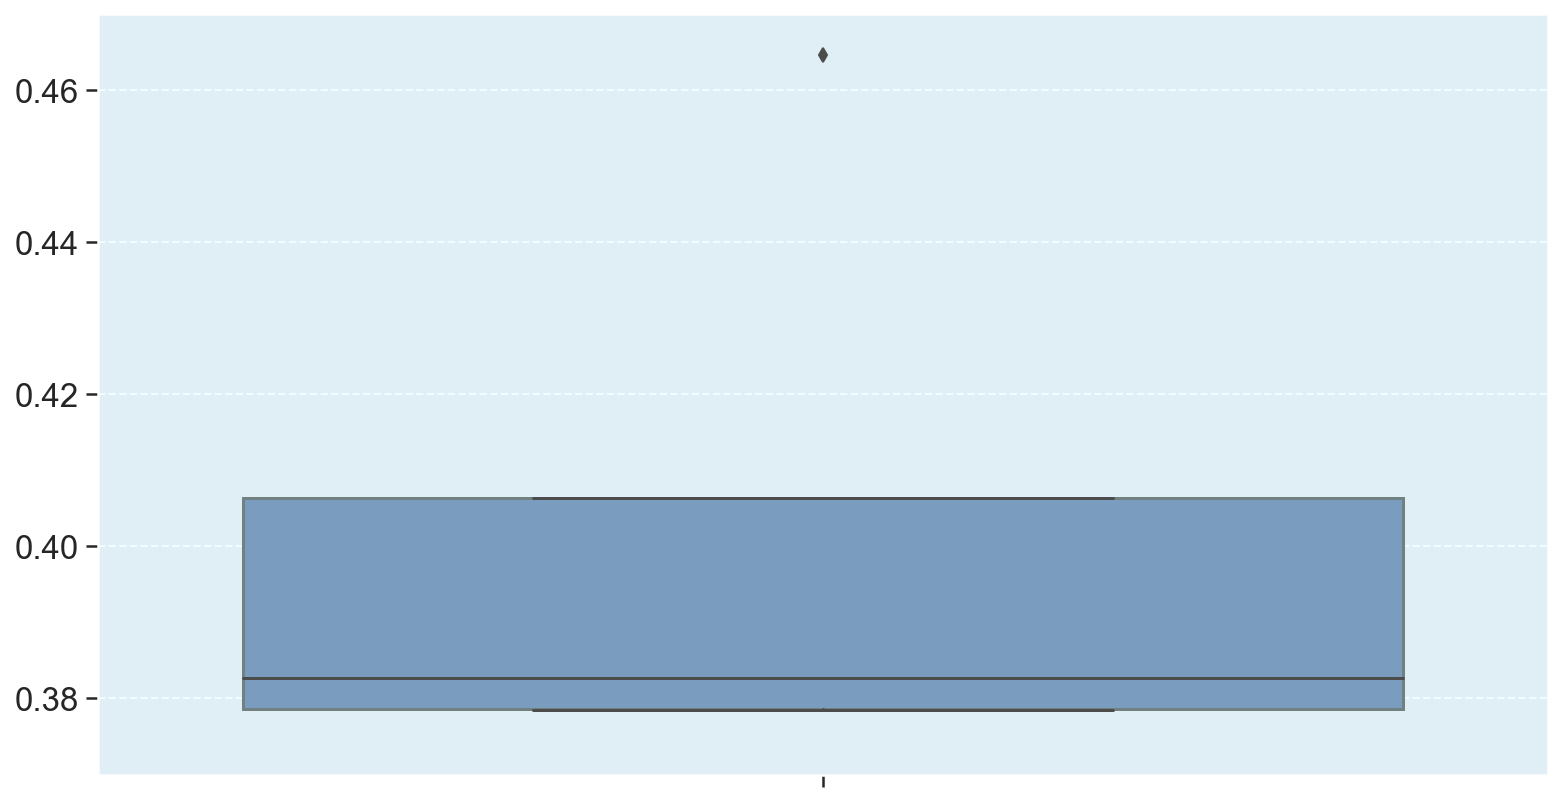

In [156]:
fig = plt.figure(figsize=(13, 7))

plt.axhspan(0.37, 0.47, color="#c9f9ff", alpha=0.3)
plt.ylim(0.37, 0.47)

sns.boxplot(y=ctt_ma1)

plt.show()

### Extra

- Análise da complexidade ciclomática por estatística descritiva

In [157]:
data = {'nome': ['backend_r1', 'backend_r2', 'frontend_r1', 'frontend_r2'],
        'media': [back_r1_df['complexity'].astype(int).mean(),
                  back_r2_df['complexity'].astype(int).mean(),
                  front_r1_df['complexity'].fillna(0).astype(int).mean(),
                  front_r2_df['complexity'].fillna(0).astype(int).mean()],
        'mediana': [back_r1_df['complexity'].astype(int).median(),
                    back_r1_df['complexity'].astype(int).median(),
                    front_r1_df['complexity'].fillna(0).astype(int).median(),
                    front_r2_df['complexity'].fillna(0).astype(int).median()],
        'max': [back_r1_df['complexity'].astype(int).max(),
                back_r2_df['complexity'].astype(int).max(),
                front_r1_df['complexity'].fillna(0).astype(int).max(),
                front_r2_df['complexity'].fillna(0).astype(int).max()],
        'min': [back_r1_df['complexity'].astype(int).min(),
                back_r2_df['complexity'].astype(int).min(),
                front_r1_df['complexity'].fillna(0).astype(int).min(),
                front_r2_df['complexity'].fillna(0).astype(int).min()],
        'moda': [back_r1_df['complexity'].astype(int).mode()[0],
                 back_r2_df['complexity'].astype(int).mode()[0],
                 front_r1_df['complexity'].fillna(0).astype(int).mode()[0],
                 front_r2_df['complexity'].fillna(0).astype(int).mode()[0]],
        'std': [back_r1_df['complexity'].astype(int).std(),
                back_r2_df['complexity'].astype(int).std(),
                front_r1_df['complexity'].fillna(0).astype(int).std(),
                front_r2_df['complexity'].fillna(0).astype(int).std()],
        'variancia': [back_r1_df['complexity'].astype(int).var(),
                      back_r2_df['complexity'].astype(int).var(),
                      front_r1_df['complexity'].fillna(0).astype(int).var(),
                      front_r2_df['complexity'].fillna(0).astype(int).var()]}

In [158]:
df_medidas = pd.DataFrame(data)
df_medidas

,nome,media,mediana,max,min,moda,std,variancia
0,backend_r1,2.928571,0.5,14,0,0,4.304993,18.532967
1,backend_r2,4.129032,0.5,24,0,5,4.856212,23.582796
2,frontend_r1,16.764706,1.0,85,0,0,29.076471,845.441176
3,frontend_r2,35.155556,1.0,411,0,0,92.257780,8511.497980


##### Box plot - Back R1

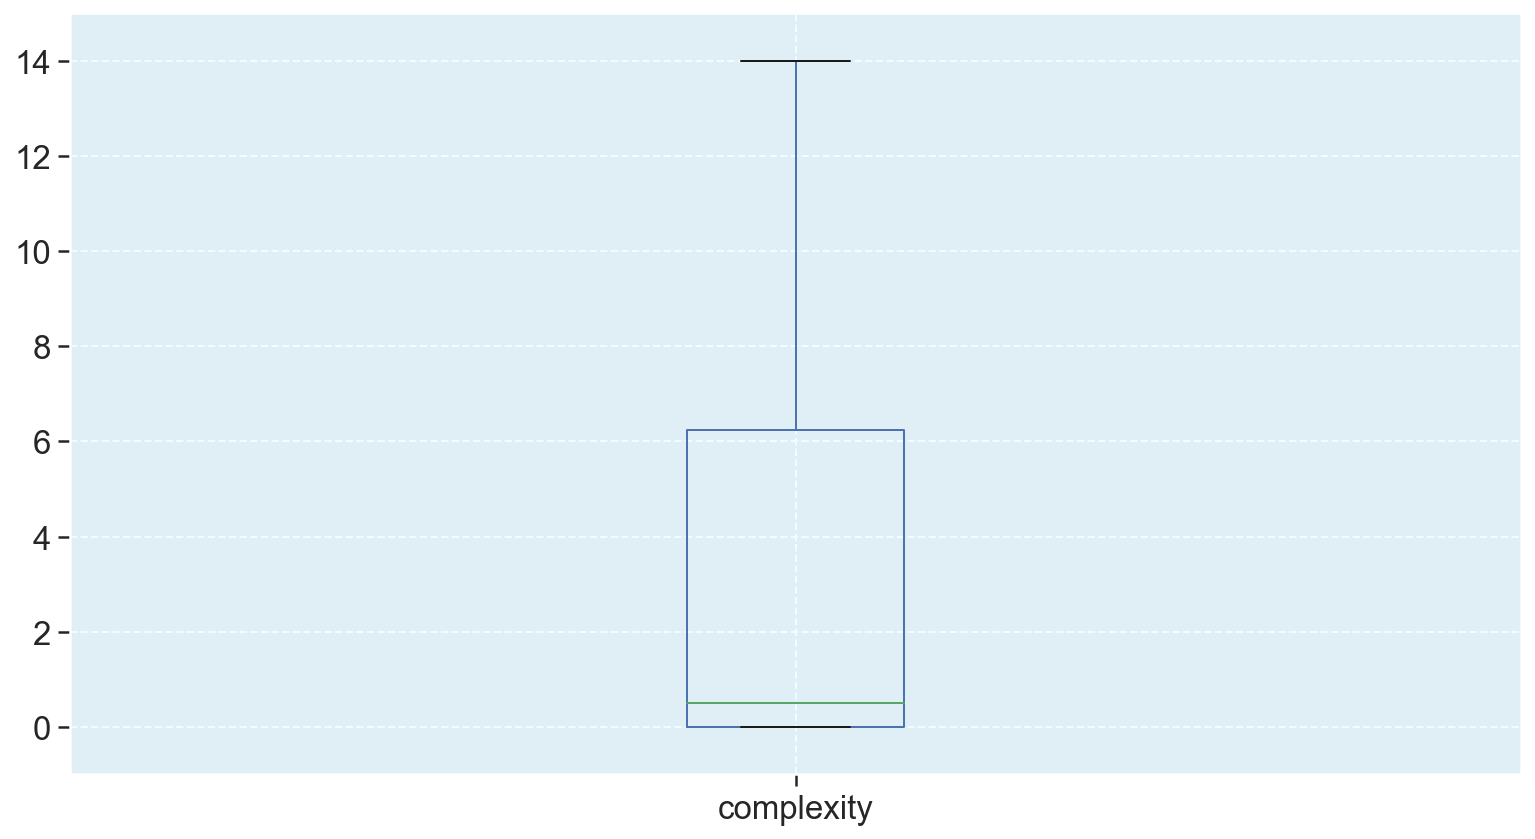

In [159]:
fig = plt.figure(figsize=(13, 7))

plt.axhspan(-1, 15, color="#c9f9ff", alpha=0.3)

plt.ylim(-1, 15)

back_r1_df['complexity'].astype(int).plot.box()

##### Box plot - Front R1

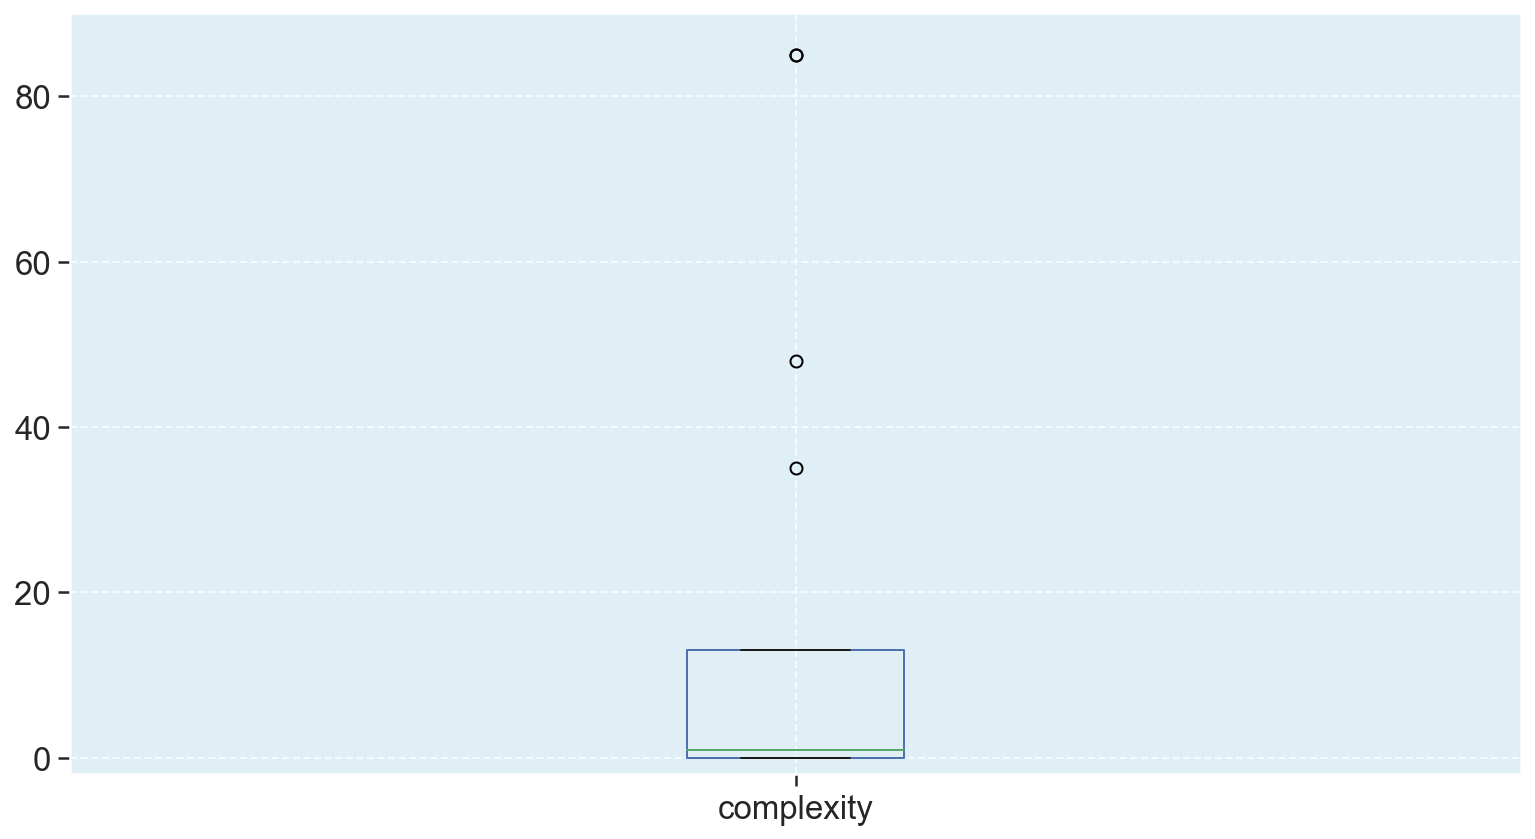

In [160]:
fig = plt.figure(figsize=(13, 7))

plt.axhspan(-2, 90, color="#c9f9ff", alpha=0.3)

plt.ylim(-2, 90)

front_r1_df['complexity'].fillna(0).astype(int).plot.box()

##### Box plot - Back R2

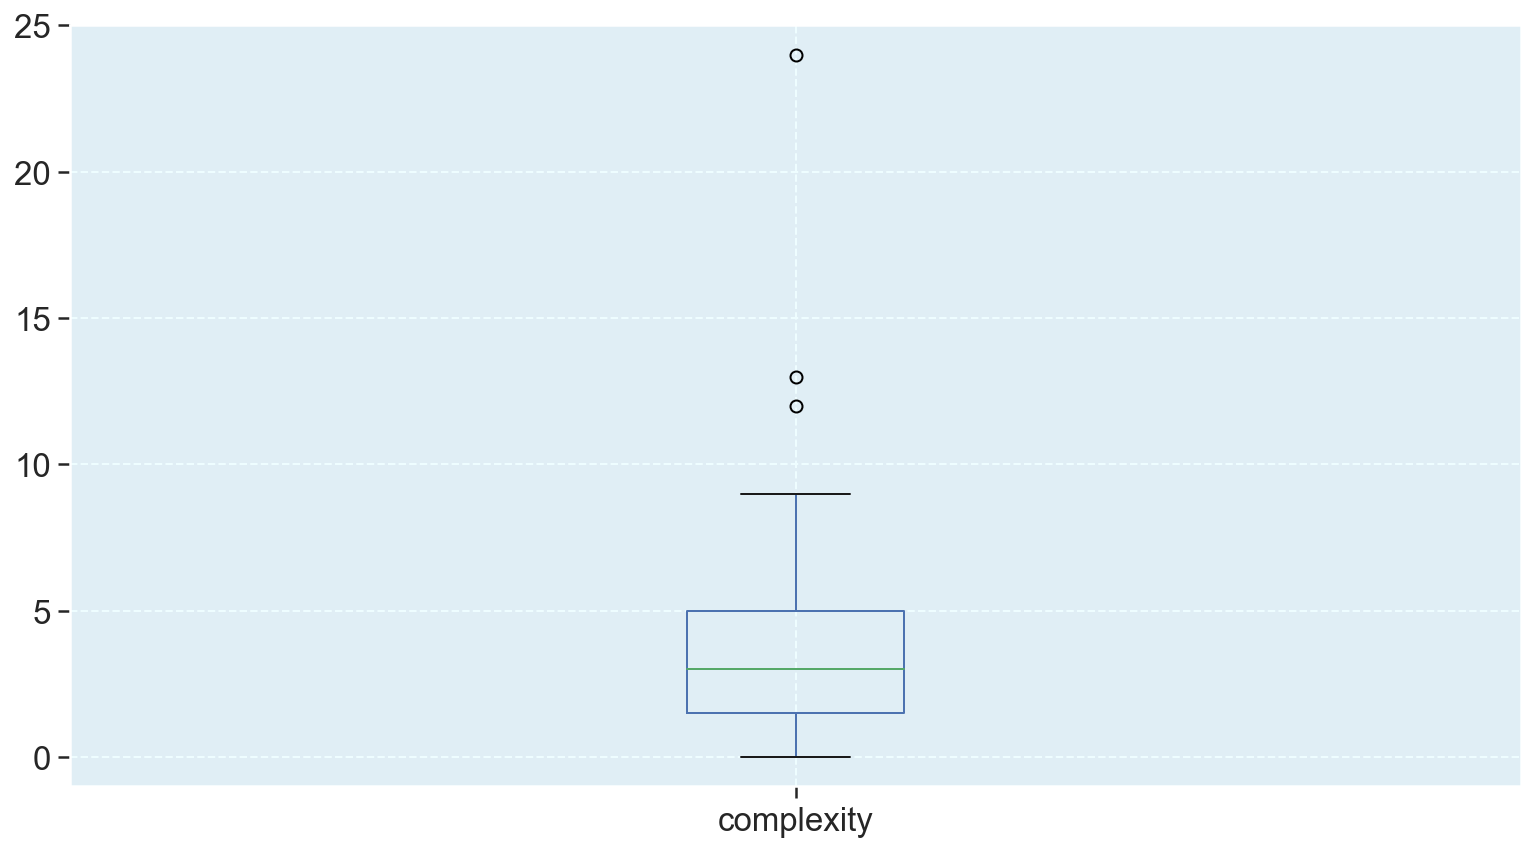

In [161]:
fig = plt.figure(figsize=(13, 7))

plt.axhspan(-1, 25, color="#c9f9ff", alpha=0.3)

plt.ylim(-1, 25)

back_r2_df['complexity'].astype(int).plot.box()

##### Box plot - Front R2

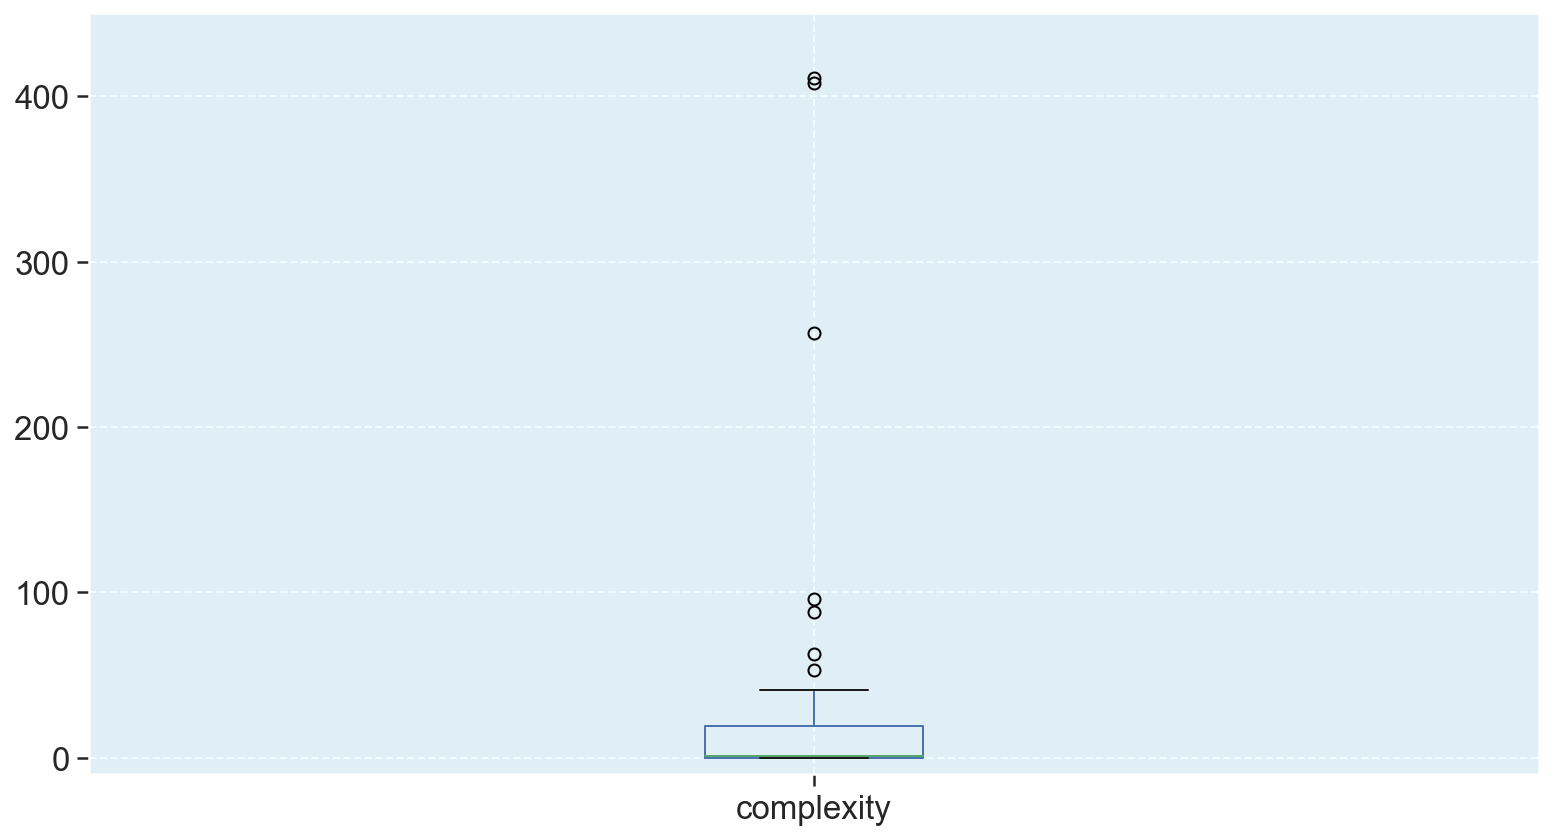

In [162]:
fig = plt.figure(figsize=(13, 7))

plt.axhspan(-10, 450, color="#c9f9ff", alpha=0.3)

plt.ylim(-10, 450)

front_r2_df['complexity'].fillna(0).astype(int).plot.box()